 <font color = red size =15>     __Credit card Fraud Detection__      </font>

 
 
 
 <font size="5" color = Brown> Problem statement:</font> 

As part of this project, we predict the fraudulent credit card transactions with the help of machine learning models.






 <font size="5" color = Blue>  Business Problem Overview: </font> 
 
For many banks, retaining high profitable customers is the number one business goal. 
Banking fraud, however, poses a significant threat to this goal for different banks. 
In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.

<font color=Green size = 5>
Actions Performed For Solution :</font>

    1.  Data Preparation.
    2.  Data Cleansing.
    3.  Exploratory Data Analysis.
    4.  Analyzing Target Variable.
    5.  Outlier Treatments & Feature Engineering. 
    6.  Imbalanced Dataset Modeling with - Logisitic Regression, SVM, Decision Tree, KNN, RandomForest, XG boost.
    7.  Data Balancing Techniques used: Random Under Sampling, Random Over Sampling, SMOTE, ADASYN.
    8.  Balanced Dataset Modeling with - Logisitic Regression, Decision Tree,RandomForest, XG boost.
    9.  Hyper Parameter Tuning applied on both Imbalanced & Balanced Datasets.
    10. Metrics derived - Train & Test ROC, Confusion Matrix, Accuracy, Precision,Recall,F1-Score.
    11. Conclusions & Recommondations.

<font color= Violet size = 5> Data Preparation:</font>

In [59]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
from scipy import interp
import itertools
import random

%matplotlib inline

In [4]:
pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_seq_items',None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)

In [8]:
#Data Sourcing:
df = pd.read_csv('creditcard.csv')
df.head(10)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6   4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7   7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8   7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9   9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   
5  0.260314 -0.568671 -0.371407  1.341262  0.359894 -0.358091 -0.137134   
6  0.081213  0.464960 -0.099254 -1.416907 -0.153826 -0.751063  0.167372   
7 -3.807864  0.615375  1.249376 -0.619468  0.291474  1.757964 -1.323865   
8  0.851084 -0.392048 -0.410430 -0.705117 -0.110452 -0.286254  0.074355   
9  0.069539 -0.736727 -0.366846  1.017614  0.836390  1.006844 -0.443523   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   
5  0.517617  0.401726 -0.058133  0.068653 -0.033194  0.084968 -0.208254   
6  0.050144 -0.443587  0.002821 -0.611987 -0.045575 -0.219633 -0.167716   
7  0.686133 -0.076127 -1.222127 -0.358222  0.324505 -0.156742  1.943465   
8 -0.328783 -0.210077 -0.499768  0.118765  0.570328  0.052736 -0.073425   
9  0.150219  0.739453 -0.540980  0.476677  0.451773  0.203711 -0.246914   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   
5 -0.559825 -0.026398 -0.371427 -0.232794  0.105915  0.253844  0.081080   
6 -0.270710 -0.154104 -0.780055  0.750137 -0.257237  0.034507  0.005168   
7 -1.015455  0.057504 -0.649709 -0.415267 -0.051634 -1.206921 -1.085339   
8 -0.268092 -0.204233  1.011592  0.373205 -0.384157  0.011747  0.142404   
9 -0.633753 -0.120794 -0.385050 -0.069733  0.094199  0.246219  0.083076   

   Amount  Class  
0  149.62      0  
1    2.69      0  
2  378.66      0  
3  123.50      0  
4   69.99      0  
5    3.67      0  
6    4.99      0  
7   40.80      0  
8   93.20      0  
9    3.68      0

In [9]:
#observe the different feature types present in the given dataset:
df.shape
#(284807, 31)

(284807, 31)

In [10]:
#Data Describe:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

                V10           V11           V12           V13           V14  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.768627e-15  9.170318e-16 -1.810658e-15  1.693438e-15  1.479045e-15   
std    1.088850e+00  1.020713e+00  9.992014e-01  9.952742e-01  9.585956e-01   
min   -2.458826e+01 -4.797473e+00 -1.868371e+01 -5.791881e+00 -1.921433e+01   
25%   -5.354257e-01 -7.624942e-01 -4.055715e-01 -6.485393e-01 -4.255740e-01   
50%   -9.291738e-02 -3.275735e-02  1.400326e-01 -1.356806e-02  5.060132e-02   
75%    4.539234e-01  7.395934e-01  6.182380e-01  6.625050e-01  4.931498e-01   
max    2.374514e+01  1.201891e+01  7.848392e+00  7.126883e+00  1.052677e+01   

                V15           V16           V17           V18           V19  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   3.482336e-15  1.392007e-15 -7.528491e-16  4.328772e-16  9.049732e-16   
std    9.153160e-01  8.762529e-01  8.493371e-01  8.381762e-01  8.140405e-01   
min   -4.498945e+00 -1.412985e+01 -2.516280e+01 -9.498746e+00 -7.213527e+00   
25%   -5.828843e-01 -4.680368e-01 -4.837483e-01 -4.988498e-01 -4.562989e-01   
50%    4.807155e-02  6.641332e-02 -6.567575e-02 -3.636312e-03  3.734823e-03   
75%    6.488208e-01  5.232963e-01  3.996750e-01  5.008067e-01  4.589494e-01   
max    8.877742e+00  1.731511e+01  9.253526e+00  5.041069e+00  5.591971e+00   

                V20           V21           V22           V23           V24  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   5.085503e-16  1.537294e-16  7.959909e-16  5.367590e-16  4.458112e-15   
std    7.709250e-01  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min   -5.449772e+01 -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%   -2.117214e-01 -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%   -6.248109e-02 -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    1.330408e-01  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    3.942090e+01  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.453003e-15  1.699104e-15 -3.660161e-16 -1.206049e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02

In [11]:
#Input Data Info:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<font color= Violet size = 5> Data Cleansing:</font>

In [12]:
#Checking the DataFrame have any Null values:
df.isnull().sum(axis=1).any()

False

In [13]:
# Drop duplicate records
df.drop_duplicates(inplace=True)
df.shape

(283726, 31)

In [14]:
print("Duplicate records dropped ",284807-283726)

Duplicate records dropped  1081


 <font color= Violet size = 5> EDA:</font>
- Here we will observe the distribution of our Target Feature Class:


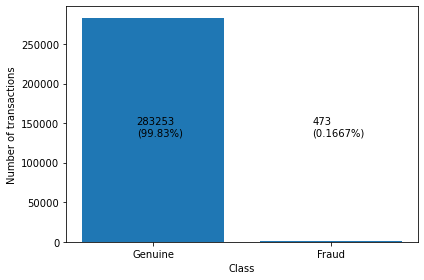

In [15]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations:
plt.bar(['Genuine','Fraud'], df['Class'].value_counts())
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.tight_layout()
plt.annotate('{}\n({:.4}%)'.format(df['Class'].value_counts()[0], 
                                   df['Class'].value_counts()[0]/df['Class'].count()*100),
             (0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}\n({:.4}%)'.format(df['Class'].value_counts()[1], 
                                         df['Class'].value_counts()[1]/df['Class'].count()*100),
             (0.70, 0.45), xycoords='axes fraction')
plt.show()

<font color=blue size=5> Inference: </font>

-   Data has **31 features, 2.85 Lakh data points.**
-   Out of 31 only **Class is int data type rest are Float types.**
-   Data points have **No null values.**
-   Data classification as below, which is **Highly Imbalanced**:
    - Non-Fraud (99.83%)
    - Fraud transactions (0.17%)

In [16]:
#DF uniqueness Check:
print('Total Unique Count:')
df['Class'].nunique()
print('Total Unique values:')
df['Class'].unique()

Total Unique Count:
Total Unique values:


array([0, 1])

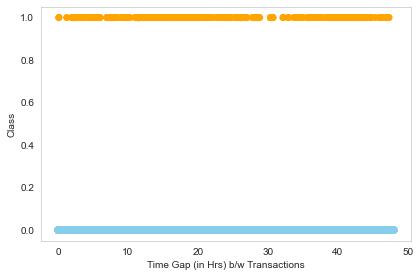

In [17]:
# Create a scatter plot to observe the distribution of classes with time
sns.set_style("whitegrid", {'axes.grid' : False})
plt.ylabel('Class')
plt.xlabel('Time Gap (in Hrs) b/w Transactions')
plt.tight_layout()
color= ['skyblue' if l == 0 else 'Orange' for l in df['Class']]
plt.scatter(df['Time']/(60*60), df['Class'], color=color)

<font color= Blue size= 5> Inference:</font>
          
- Time data was collected over the period of 48 Hours and apparently, the 'Time' variable isn't a good predictor in this particular problem. 
  
</br>  
- As seen above, there is no specific pattern observred for both non-fradulent and fraudulent transactions with respective hour of the day. So this feature is not a value add for further Analysis. So,it can be dropped.


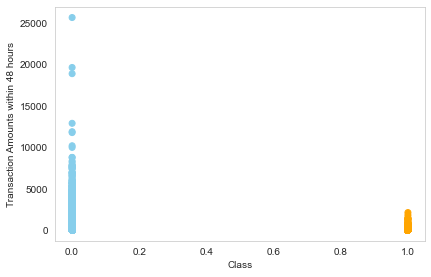

In [18]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.set_style("whitegrid", {'axes.grid' : False})
plt.xlabel('Class')
plt.ylabel('Transaction Amounts within 48 hours')
plt.tight_layout()
color= ['skyblue' if l == 0 else 'Orange' for l in df['Class']]
plt.scatter( df['Class'], df['Amount'],color=color)

<font size =5 color=blue> Inference: </font>
                    
- Above plots indicate that fraudulent transactions are at smaller values when compared to non-fraudulent transactions.

</br>

- Since, this Amount is a highly feature, we need to do the feature Engineer on the same. 


<font color=Skyblue size = 5> Correlation:</font>

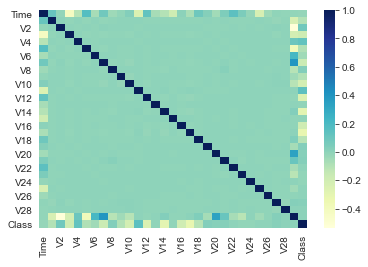

In [19]:
#Correlation plot.
corr = df.corr()
sns.heatmap(corr,cmap='YlGnBu')

<font size = 5 color = Blue> Inference: </font>
           

           
- Correlation between features is quite low. Because input data is already PCA Transformed.


In [20]:
# Features with absolute correlation:
# Sorted from High to low correlation.
df_corr  = df.drop("Class", axis=1).apply(lambda x: x.corr(df.Class)).abs().sort_values(ascending=False).to_frame().reset_index()
df_corr.columns = ['features','corr_values']
df_corr

features  corr_values
0       V17     0.313498
1       V14     0.293375
2       V12     0.250711
3       V10     0.206971
4       V16     0.187186
5        V3     0.182322
6        V7     0.172347
7       V11     0.149067
8        V4     0.129326
9       V18     0.105340
10       V1     0.094486
11       V9     0.094021
12       V5     0.087812
13       V2     0.084624
14       V6     0.043915
15      V19     0.033631
16       V8     0.033068
17      V21     0.026357
18      V27     0.021892
19      V20     0.021486
20     Time     0.012359
21      V28     0.009682
22      V24     0.007210
23      V23     0.006333
24   Amount     0.005777
25      V22     0.004887
26      V26     0.004265
27      V13     0.003897
28      V15     0.003300
29      V25     0.003202

In [21]:
#picking the list of features into "all_features":
all_features = list(df_corr['features'])
print(all_features)

['V17', 'V14', 'V12', 'V10', 'V16', 'V3', 'V7', 'V11', 'V4', 'V18', 'V1', 'V9', 'V5', 'V2', 'V6', 'V19', 'V8', 'V21', 'V27', 'V20', 'Time', 'V28', 'V24', 'V23', 'Amount', 'V22', 'V26', 'V13', 'V15', 'V25']


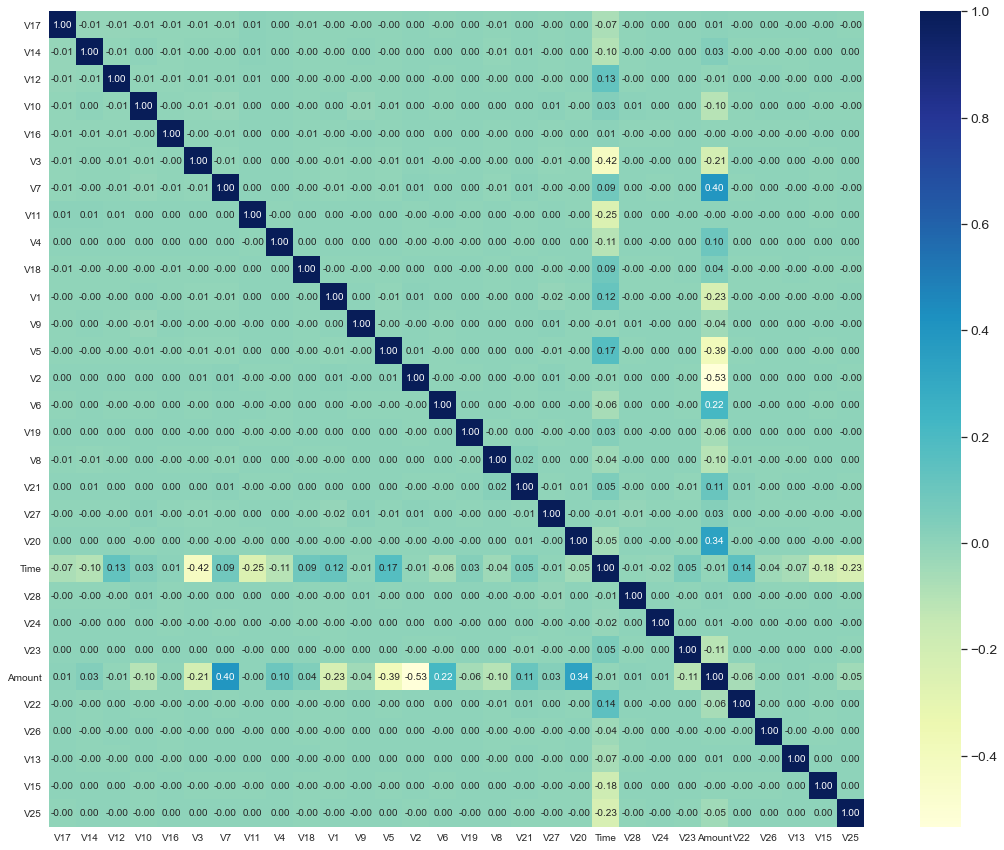

In [22]:
cols = df_corr['features']
cm = np.corrcoef(df[cols].values.T)
f,ax = plt.subplots(figsize=(20,15))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True, fmt = '.2f', annot_kws={'size':10},yticklabels=cols.values,xticklabels=cols.values,cmap='YlGnBu')
plt.show()

<font size = 5 color = Blue> Inference: </font>
           
-  Given data is PCA Transformed, so even a single PCA component deletion might yield to multiple potential features.

</br>

-  Dropping the Time feature alone as of now, as it is not much value added.


In [23]:
#Dropping Time Feature:
df = df.drop(['Time'],axis=1)
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

<font size = 5 color = SkyBlue> Outliers check: </font>
          


Number of outliers below the lower bound:  0  (0.0%)
Number of outliers above the upper bound:  31685  (11.17%)


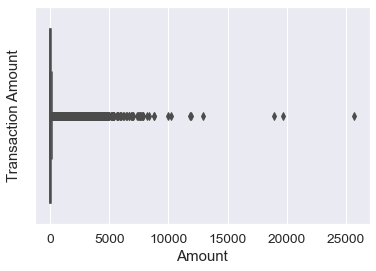

In [24]:
#Checking Outliers for Amount feature alone:
#Time lies within 48 hours, also we dropped the same.
#Rest of the features are PCA component.
sns.boxplot(df['Amount'], labels = ['Boxplot'])
plt.ylabel('Transaction Amount')
plt.plot()

amount = df[['Amount']].sort_values(by='Amount')
q1, q3 = np.percentile(amount,[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)

print('Number of outliers below the lower bound: ', amount[amount['Amount'] < lower_bound].count()[0],
     ' ({:.4}%)'.format(amount[amount['Amount'] < lower_bound].count()[0] / amount['Amount'].count() * 100))
print('Number of outliers above the upper bound: ', amount[amount['Amount'] > upper_bound].count()[0],
      ' ({:.4}%)'.format(amount[amount['Amount'] > upper_bound].count()[0] / amount['Amount'].count() * 100))

<font size = 5 color = Blue> Inference: </font>
    
    
- Here we have 11% of data is above upperbound, no action take as of now we are going to perform Feature Engineer on this feature


<font size = 5 color = SkyBlue> Feature Engineering: </font>


<font size = 5 color = Orange> Scaling: </font>  

- Here performing scaling on **Amount** feature, by examining different Scaling approaches we have:

In [25]:
#performing Log scaling:

df['amount_log'] = np.log(df.Amount + 0.01)

In [26]:
#performing Standard scaling:

from sklearn.preprocessing import StandardScaler # importing a class from a module of a library
 # object of the class StandardScaler ()
ss = StandardScaler()
df['amount_std_scaled'] = ss.fit_transform(df['Amount'].values.reshape(-1,1))

In [27]:
#performing Minmax scaling:

from sklearn.preprocessing import MinMaxScaler
# object of the class MinMaxScaler ()
mm = MinMaxScaler() 
df['amount_minmax'] = mm.fit_transform(df['Amount'].values.reshape(-1,1))

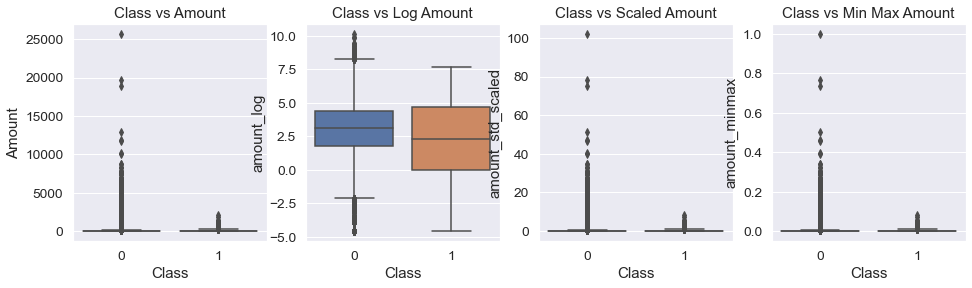

In [28]:
#Feature engineering to a better visualization of the values

# Let's explore the Amount by Class and see the distribuition of Amount transactions
fig , axs = plt.subplots(nrows = 1 , ncols = 4 , figsize = (16,4))

sns.boxplot(x ="Class",y="Amount",data=df, ax = axs[0])
axs[0].set_title("Class vs Amount")

sns.boxplot(x ="Class",y="amount_log",data=df, ax = axs[1])
axs[1].set_title("Class vs Log Amount")

sns.boxplot(x ="Class",y="amount_std_scaled",data=df, ax = axs[2])
axs[2].set_title("Class vs Scaled Amount")

sns.boxplot(x ="Class",y="amount_minmax",data=df, ax = axs[3])
axs[3].set_title("Class vs Min Max Amount")

# fig.suptitle('Amount by Class', fontsize=20)
plt.show()

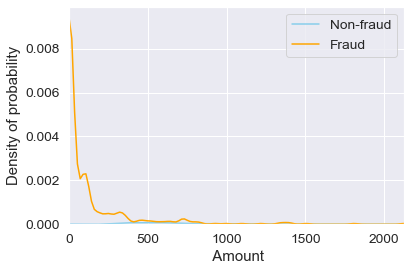

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [29]:
#DistPlot for Amount Feature:
target_0 = df.loc[df['Class'] == 0]
target_1 = df.loc[df['Class'] == 1]
ax1=sns.distplot(target_0[['Amount']], hist=False, color='skyblue', label='Non-fraud')
ax2=sns.distplot(target_1[['Amount']], hist=False, color='Orange', label='Fraud')
ax1.set_xlim(0, max(df[df['Class']==1]['Amount']))
ax2.set_xlim(0, max(df[df['Class']==1]['Amount']))
plt.legend()
plt.xlabel(' Amount')
plt.ylabel('Density of probability')
plt.show()

df.loc[df['Class'] == 1]['Amount'].describe()

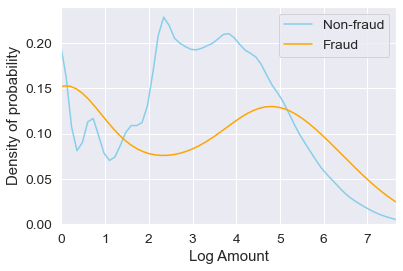

count    473.000000
mean       2.290134
std        2.955851
min       -4.605170
25%        0.009950
50%        2.285439
75%        4.662495
max        7.661941
Name: amount_log, dtype: float64

In [30]:
#DistPlot For LogAmount Feature:

target_0 = df.loc[df['Class'] == 0]
target_1 = df.loc[df['Class'] == 1]
ax1=sns.distplot(target_0[['amount_log']], hist=False, color='skyblue', label='Non-fraud')
ax2=sns.distplot(target_1[['amount_log']], hist=False, color='Orange', label='Fraud')
ax1.set_xlim(0, max(df[df['Class']==1]['amount_log']))
ax2.set_xlim(0, max(df[df['Class']==1]['amount_log']))
plt.legend()
plt.xlabel('Log Amount')
plt.ylabel('Density of probability')
plt.show()
#with this plot we can clearly see the 
df.loc[df['Class'] == 1]['amount_log'].describe()

<font size = 5 color = Blue> Inference: </font>
    
    
- From above Plots the LogTransformation seems the best choice, because the Amount Feature can easily distingushable with LogAmount feature than any other scaling options or Scaled_features.

In [31]:
#Data Frame Shape, post new amount feature:
#Post selection of best feature among them, we need to drop these not required scaling features.
df.shape

(283726, 33)

In [32]:
#Keeping amount_log, so dropping Amount Feature:
df = df.drop(['Amount','amount_std_scaled','amount_minmax'],axis=1)
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'amount_log'],
      dtype='object')

In [33]:
df.describe()

V1             V2             V3             V4  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean        0.005917      -0.004135       0.001613      -0.002966   
std         1.948026       1.646703       1.508682       1.414184   
min       -56.407510     -72.715728     -48.325589      -5.683171   
25%        -0.915951      -0.600321      -0.889682      -0.850134   
50%         0.020384       0.063949       0.179963      -0.022248   
75%         1.316068       0.800283       1.026960       0.739647   
max         2.454930      22.057729       9.382558      16.875344   

                  V5             V6             V7             V8  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean        0.001828      -0.001139       0.001801      -0.000854   
std         1.377008       1.331931       1.227664       1.179054   
min      -113.743307     -26.160506     -43.557242     -73.216718   
25%        -0.689830      -0.769031      -0.552509      -0.208828   
50%        -0.053468      -0.275168       0.040859       0.021898   
75%         0.612218       0.396792       0.570474       0.325704   
max        34.801666      73.301626     120.589494      20.007208   

                  V9            V10            V11            V12  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.001596      -0.001441       0.000202      -0.000715   
std         1.095492       1.076407       1.018720       0.994674   
min       -13.434066     -24.588262      -4.797473     -18.683715   
25%        -0.644221      -0.535578      -0.761649      -0.406198   
50%        -0.052596      -0.093237      -0.032306       0.139072   
75%         0.595977       0.453619       0.739579       0.616976   
max        15.594995      23.745136      12.018913       7.848392   

                 V13            V14            V15            V16  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean        0.000603       0.000252       0.001043       0.001162   
std         0.995430       0.952215       0.914894       0.873696   
min        -5.791881     -19.214325      -4.498945     -14.129855   
25%        -0.647862      -0.425732      -0.581452      -0.466860   
50%        -0.012927       0.050209       0.049299       0.067119   
75%         0.663178       0.492336       0.650104       0.523512   
max         7.126883      10.526766       8.877742      17.315112   

                 V17            V18            V19            V20  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean        0.000170       0.001515      -0.000264       0.000187   
std         0.842507       0.837378       0.813379       0.769984   
min       -25.162799      -9.498746      -7.213527     -54.497720   
25%        -0.483928      -0.498014      -0.456289      -0.211469   
50%        -0.065867      -0.002142       0.003367      -0.062353   
75%         0.398972       0.501956       0.458508       0.133207   
max         9.253526       5.041069       5.591971      39.420904   

                 V21            V22            V23            V24  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.000371      -0.000015       0.000198       0.000214   
std         0.723909       0.724550       0.623702       0.605627   
min       -34.830382     -10.933144     -44.807735      -2.836627   
25%        -0.228305      -0.542700      -0.161703      -0.354453   
50%        -0.029441       0.006675      -0.011159       0.041016   
75%         0.186194       0.528245       0.147748       0.439738   
max        27.202839      10.503090      22.528412       4.584549   

                 V25            V26            V27            V28  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.000232       0.000149       0.001763       0.000547   
std         0.521220       0.482053       0.395744       0.328027   
min       

In [34]:
#DF Shape, Post drop off unnecessary features:

df.shape

(283726, 30)


#scatter plot for these top 10 correlated features alone:
sns.set()
arr = req_features[:10]
sns.pairplot(df[arr], size = 2.5)
plt.show()


<font size = 5 color = SkyBlue> Data Splitting: </font>



In [35]:
### Splitting the data into train & test data

from sklearn import model_selection
from sklearn.model_selection import train_test_split

random.seed(33)

y= df['Class']
X = df.drop(columns=['Class'])
X.head()


V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   amount_log  
0    5.008166  
1    0.993252  
2    5.936665  
3    4.816322  
4    4.248495

In [36]:
X.describe()

V1             V2             V3             V4  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean        0.005917      -0.004135       0.001613      -0.002966   
std         1.948026       1.646703       1.508682       1.414184   
min       -56.407510     -72.715728     -48.325589      -5.683171   
25%        -0.915951      -0.600321      -0.889682      -0.850134   
50%         0.020384       0.063949       0.179963      -0.022248   
75%         1.316068       0.800283       1.026960       0.739647   
max         2.454930      22.057729       9.382558      16.875344   

                  V5             V6             V7             V8  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean        0.001828      -0.001139       0.001801      -0.000854   
std         1.377008       1.331931       1.227664       1.179054   
min      -113.743307     -26.160506     -43.557242     -73.216718   
25%        -0.689830      -0.769031      -0.552509      -0.208828   
50%        -0.053468      -0.275168       0.040859       0.021898   
75%         0.612218       0.396792       0.570474       0.325704   
max        34.801666      73.301626     120.589494      20.007208   

                  V9            V10            V11            V12  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.001596      -0.001441       0.000202      -0.000715   
std         1.095492       1.076407       1.018720       0.994674   
min       -13.434066     -24.588262      -4.797473     -18.683715   
25%        -0.644221      -0.535578      -0.761649      -0.406198   
50%        -0.052596      -0.093237      -0.032306       0.139072   
75%         0.595977       0.453619       0.739579       0.616976   
max        15.594995      23.745136      12.018913       7.848392   

                 V13            V14            V15            V16  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean        0.000603       0.000252       0.001043       0.001162   
std         0.995430       0.952215       0.914894       0.873696   
min        -5.791881     -19.214325      -4.498945     -14.129855   
25%        -0.647862      -0.425732      -0.581452      -0.466860   
50%        -0.012927       0.050209       0.049299       0.067119   
75%         0.663178       0.492336       0.650104       0.523512   
max         7.126883      10.526766       8.877742      17.315112   

                 V17            V18            V19            V20  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean        0.000170       0.001515      -0.000264       0.000187   
std         0.842507       0.837378       0.813379       0.769984   
min       -25.162799      -9.498746      -7.213527     -54.497720   
25%        -0.483928      -0.498014      -0.456289      -0.211469   
50%        -0.065867      -0.002142       0.003367      -0.062353   
75%         0.398972       0.501956       0.458508       0.133207   
max         9.253526       5.041069       5.591971      39.420904   

                 V21            V22            V23            V24  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.000371      -0.000015       0.000198       0.000214   
std         0.723909       0.724550       0.623702       0.605627   
min       -34.830382     -10.933144     -44.807735      -2.836627   
25%        -0.228305      -0.542700      -0.161703      -0.354453   
50%        -0.029441       0.006675      -0.011159       0.041016   
75%         0.186194       0.528245       0.147748       0.439738   
max        27.202839      10.503090      22.528412       4.584549   

                 V25            V26            V27            V28  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.000232       0.000149       0.001763       0.000547   
std         0.521220       0.482053       0.395744       0.328027   
min       

In [37]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=33)

# Preserving X_test & y_test to evaluate on the test data once model build completed:
X.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   amount_log  
0    5.008166  
1    0.993252  
2    5.936665  
3    4.816322  
4    4.248495

In [38]:
#validating the Target Feature Split :
print('Total Fraudlent records:')
print(np.sum(y))
print('Total Train Fraudlent records:')
print(np.sum(y_train))
print('Total Test Fraudlent records:')
print(np.sum(y_test))

Total Fraudlent records:
473
Total Train Fraudlent records:
330
Total Test Fraudlent records:
143


<font size = 5 color = SkyBlue> Skewness Check: </font>


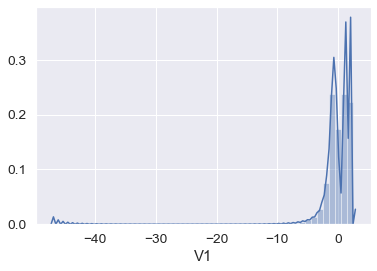

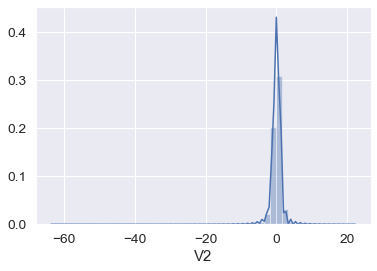

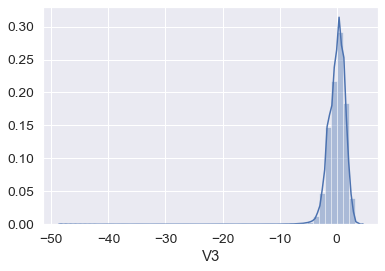

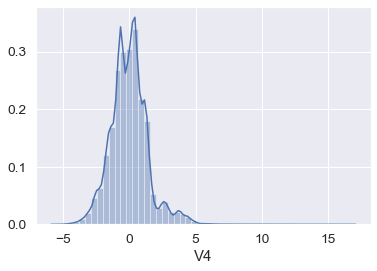

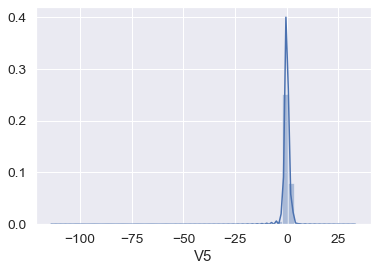

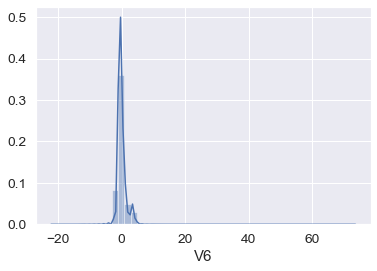

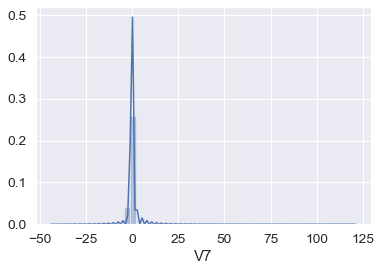

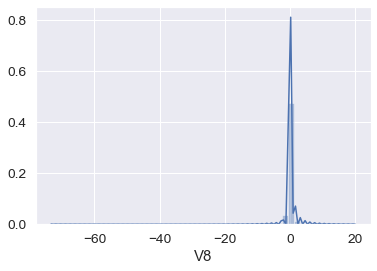

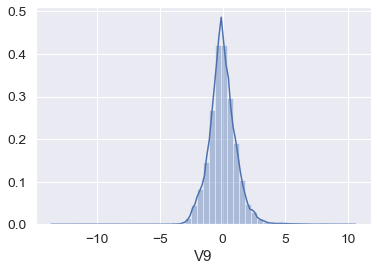

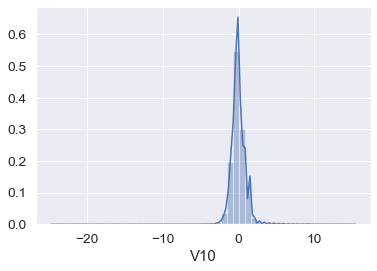

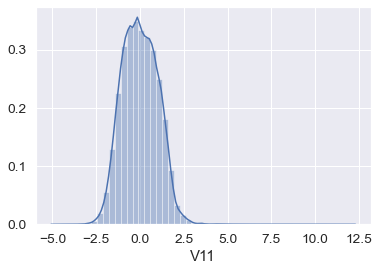

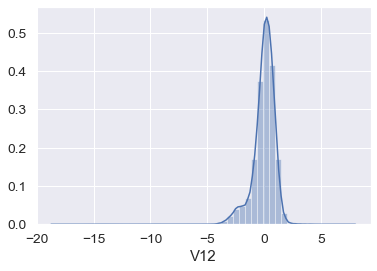

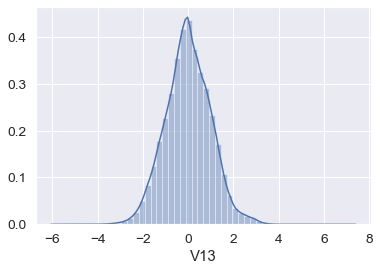

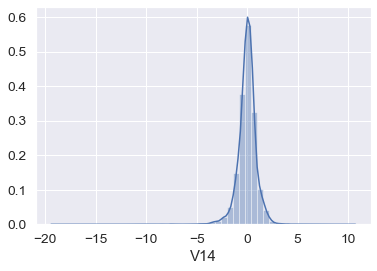

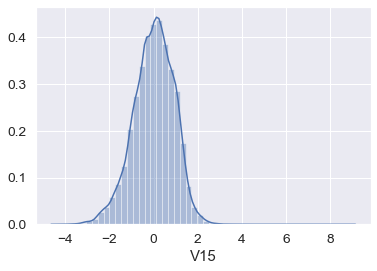

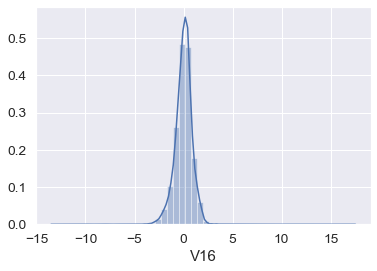

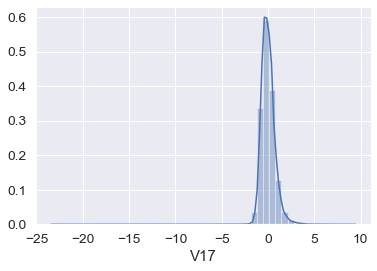

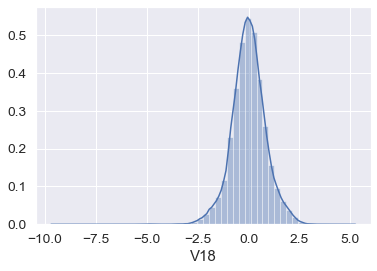

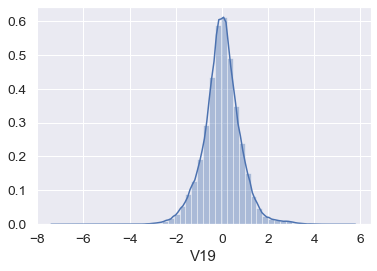

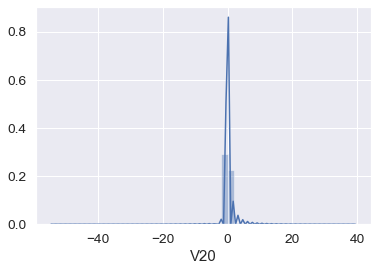

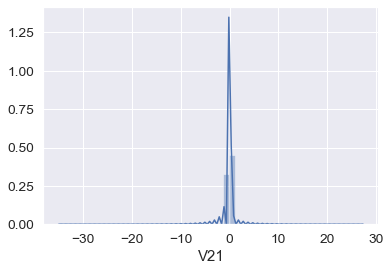

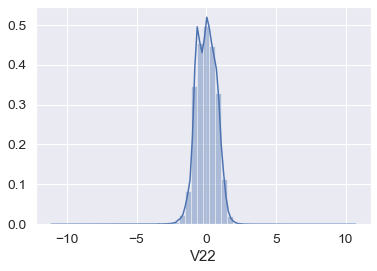

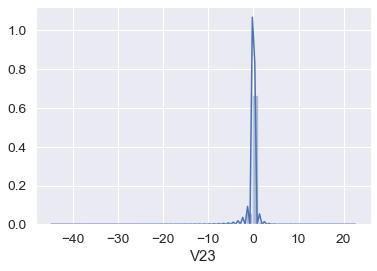

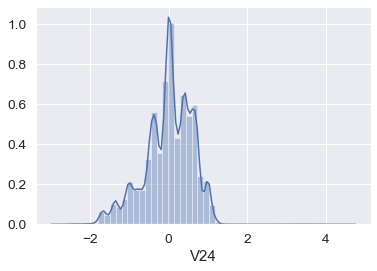

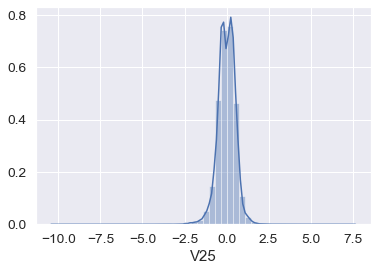

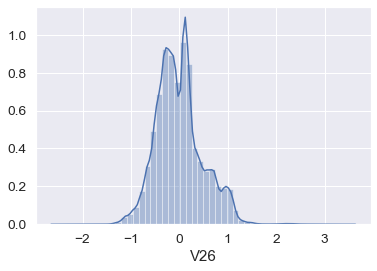

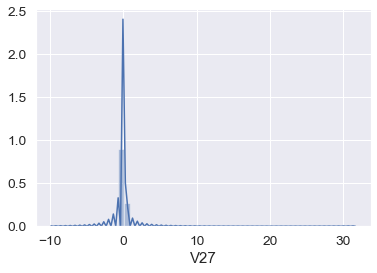

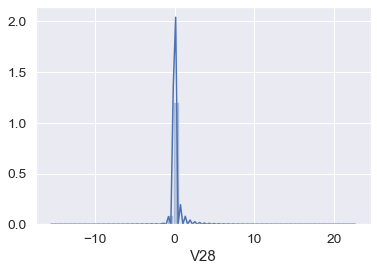

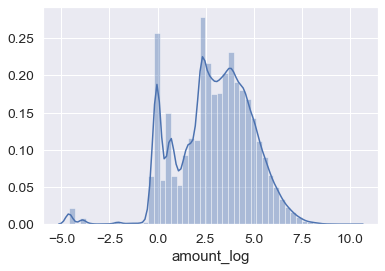

In [39]:
# plot the histogram of a variable from the dataset to see the skewness
# plot for all the columns post findout of relevant columns/featuers 
for col in X_train.select_dtypes('float'):
    #print(col)
    plt.figure()
    sns.distplot(X_train[col])

<font color = Blue Size = 5> Inference: </font>

- Here for Exmaple: V1 & amount_log features are skewed 

<font color = SkyBlue size=5>  Power Transformation: </font>

In [40]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
# To make distribution more gaussian
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
pt = PowerTransformer(copy=False)
pt.fit(X_train)                       ## Fit the PT on training data
X_train_pt = pt.transform(X_train)    ## Then apply on all data
X_test_pt = pt.transform(X_test)


#DataFrame out of Transformed PowerData:
X_train_pow = pd.DataFrame(data=X_train_pt, columns=X.columns)
print("Power transformed Train set (sample records): ")
X_train_pow.head()


Power transformed Train set (sample records): 


V1        V2        V3        V4        V5        V6        V7  \
0  0.506998 -0.065234 -0.095744  0.789250  0.079981  0.387263  0.025030   
1 -0.313757 -1.448703  0.865595  1.428101 -1.441419  1.039584 -0.524187   
2 -0.265616  0.079831  1.363142  0.317719  0.116439  0.864783  0.213101   
3 -0.662461  0.539184  1.645539  0.069079  0.249500 -0.706427  0.575612   
4  0.827171 -0.804407  0.471478 -1.083193 -1.191525  0.087105 -1.209066   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.157044  0.044290  0.077076  1.307050  0.717062 -1.221877  0.747923   
1  0.413703  1.530537 -0.407191 -0.260461  0.781502 -1.261349 -0.768429   
2  0.024853  0.904275 -0.606304 -1.763979  0.963125  0.786028 -1.380630   
3 -0.233504 -0.812236 -0.591923 -0.095764  0.720390  1.505405 -0.185781   
4  0.121229 -1.679344  1.422896  1.210739 -0.761926 -0.392546 -0.184499   

        V15       V16       V17       V18       V19       V20       V21  \
0 -0.119699 -0.899967  0.296071 -0.862087 -0.622388 -0.287777  0.129053   
1 -1.962790 -0.031330 -0.091720  1.100554  0.338433  1.277182  0.646141   
2 -1.966655 -1.192497  0.427274 -1.447495  0.967053  0.017716 -0.602147   
3  0.816785  0.042257 -0.537140 -0.619382  0.167663  0.204268 -0.217572   
4  0.497630 -0.307758  0.523175  0.536847 -0.609231 -0.522182  0.025651   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.428232 -0.197183 -0.550136  1.228175 -0.430087  0.060535  0.008578   
1  0.570862 -1.123455 -0.001602  0.634582 -0.244097 -0.012972  0.410026   
2 -0.811478 -0.067407 -1.170616 -0.788754  0.326802 -0.186864 -0.597867   
3 -0.784534 -0.228385  0.653525  0.313238  0.347107  0.012182  0.245187   
4  0.537823  0.033823 -0.102821  0.372967 -0.095445  0.140236  0.044333   

   amount_log  
0    0.235973  
1    1.905227  
2   -0.141886  
3   -0.911979  
4   -0.470859

In [41]:
#DataFrame out of Transformed PowerData:
X_test_pow = pd.DataFrame(data=X_test_pt, columns=X.columns)
print("Power transformed Test set (sample records): ")
X_test_pow.head()

Power transformed Test set (sample records): 


V1        V2        V3        V4        V5        V6        V7  \
0 -0.643101  0.381599  1.289770 -0.599836  0.285743  0.619097 -0.020598   
1  0.451968 -0.379065  0.038230  0.156594 -0.546798 -0.476640 -0.032472   
2  1.465884 -0.103789 -0.840101  0.341625 -0.049432 -0.891262  0.162445   
3 -0.401915  0.182507  1.394139  0.266822 -0.454354  0.065666 -0.175018   
4  0.612956  0.206303  0.585644  1.541480 -0.104149  0.336612 -0.205828   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.422745  0.114800 -1.262934  0.331092 -0.518832 -0.721060 -1.354062   
1 -0.164192  0.081591  0.039959  1.288159  0.733400 -0.188890  0.426031   
2 -0.399365  0.506269  0.107079 -0.803358  0.495179  0.373171  0.158268   
3  0.115830  0.677829 -0.249571 -1.300024 -0.913173 -1.315705 -0.195122   
4 -0.039063 -0.397175  0.592185 -1.143289  0.081387  1.356545 -0.348132   

        V15       V16       V17       V18       V19       V20       V21  \
0  0.056289  1.824673 -0.264591  1.932162  0.077797  0.025136 -0.013552   
1  0.417935  0.531515 -0.692474  0.347544  0.178222  0.246060  0.348469   
2 -0.035435 -0.162300 -0.458631 -1.020250  0.257678 -0.267297 -0.402321   
3  1.011914  0.004881 -0.190579  0.448106  0.785218 -0.163379  0.184137   
4  0.811256  1.563763 -1.347540  0.124924 -1.044002 -0.017380 -0.084080   

        V22       V23       V24       V25       V26       V27       V28  \
0 -0.206604 -0.620192 -0.110925  0.501426  1.036948  0.046183  0.259771   
1  0.543888 -0.360903  0.698849  0.628528  2.053585 -0.287026  0.052847   
2 -0.971019  0.497901 -0.269985 -0.544637  0.507927 -0.186196 -0.183339   
3  0.586206  0.015328 -0.139808 -1.996800  0.629888  0.233220  0.623442   
4 -0.325567 -0.089130 -0.795620  0.661793 -0.042813  0.053552  0.113964   

   amount_log  
0   -0.607217  
1    1.032522  
2   -1.531724  
3   -0.381039  
4   -0.032015

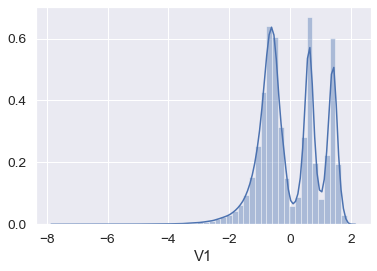

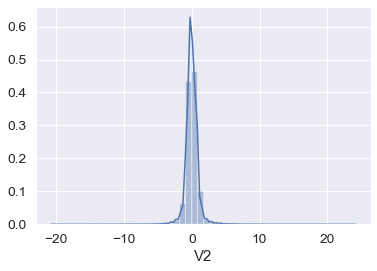

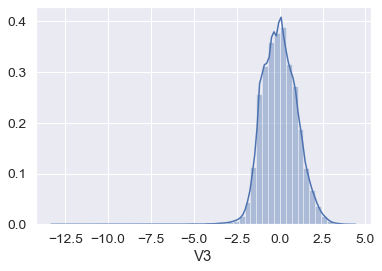

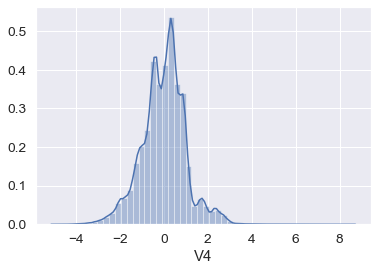

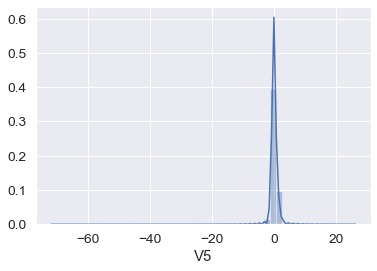

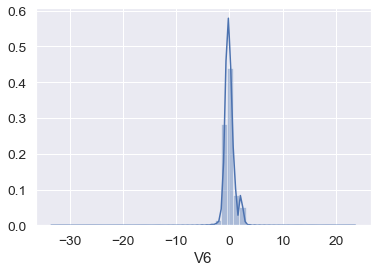

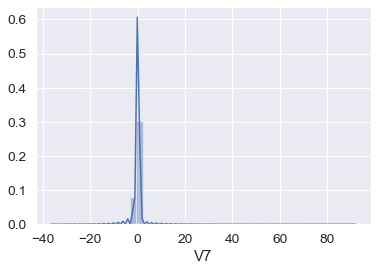

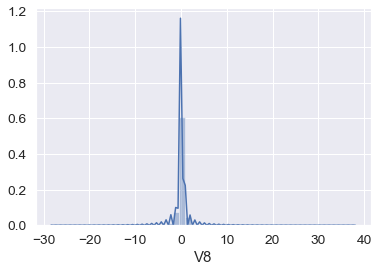

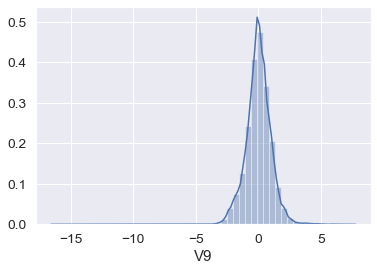

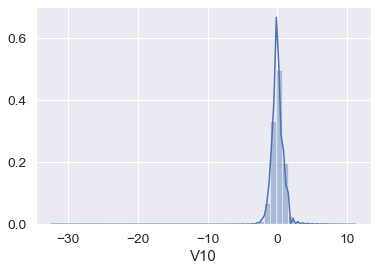

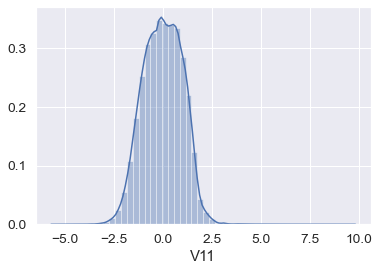

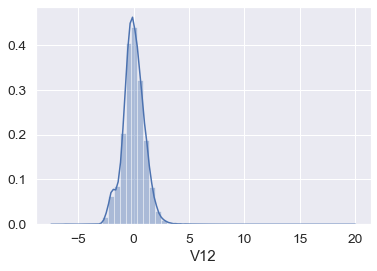

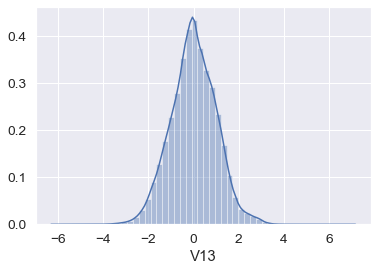

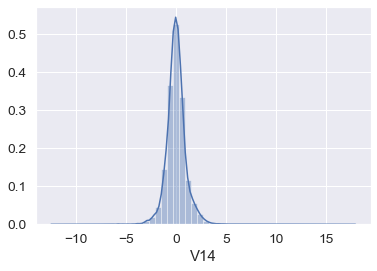

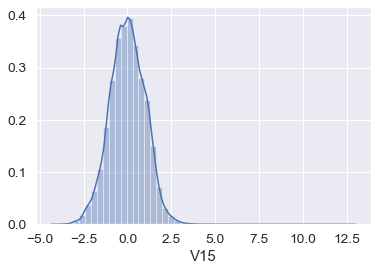

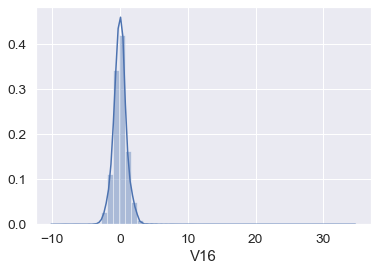

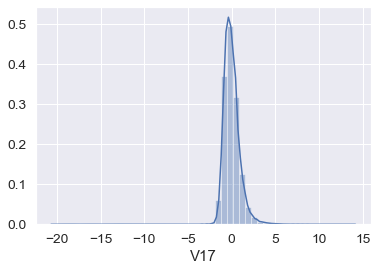

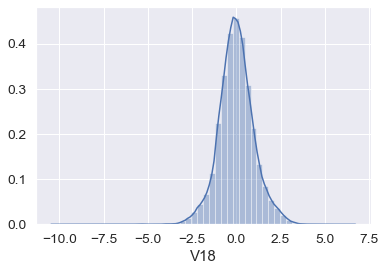

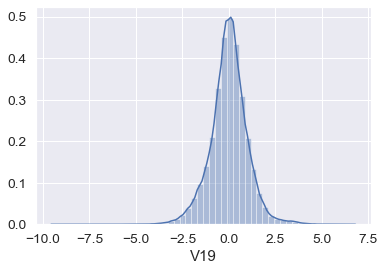

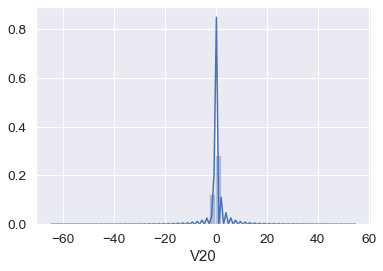

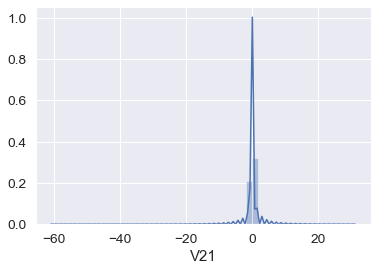

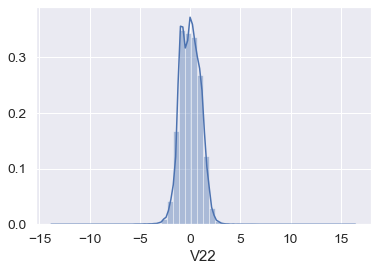

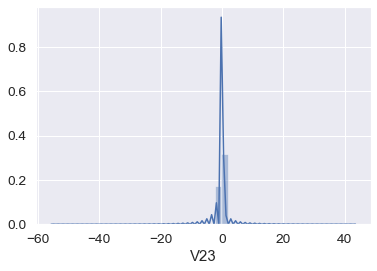

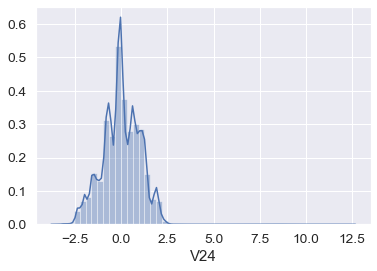

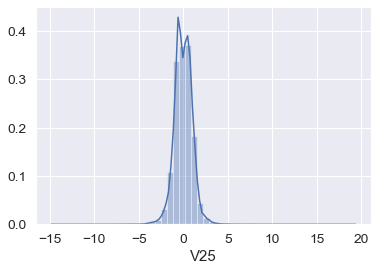

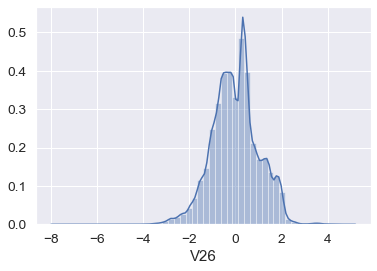

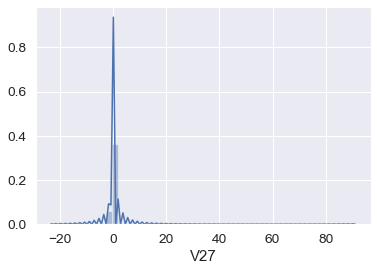

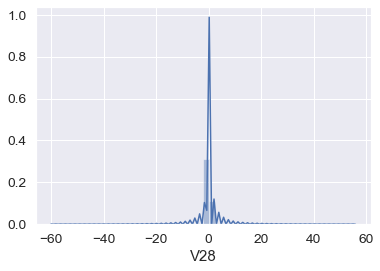

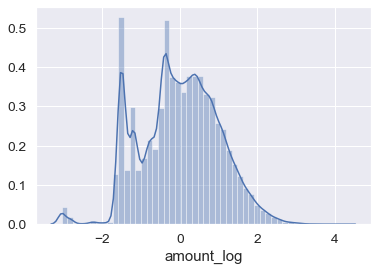

In [42]:
# plot the histogram of a variable from the dataset to see the skewness, Post PowerTransformation:
for col in X_train_pow.select_dtypes('float'):
    #print(col)
    plt.figure()
    sns.distplot(X_train_pow[col])


<font color = Blue Size = 5> Inference: </font>
- Post powerTransformation data becam Gaussian, We can clearly observe that **Amount_log & V1** features are Gaussian now.


<font color = SkyBlue size=5>   Model Building </font>

-  Build different models on the imbalanced dataset and see the result

In [43]:
#Function to plot the ROC curve, confusion matrix and Computation of other metrics:
def plot_CM_and_ROC_curve(Classifier,X_train, y_train, X_test, y_test):  

    mean_fpr = np.linspace(0, 1, 100)
    name = Classifier[0][0]
    model= Classifier[0][1]
    class_names = ['Non-Fraud', 'Fraud']
    confusion_matrix_total = [[0, 0], [0, 0]]
    
    #Obtain probabilities for train data
    probas1_ = model.fit(X_train, y_train).predict_proba(X_train)
    #Obtain probabilities for test data
    probas_ = model.fit(X_train, y_train).predict_proba(X_test)
    sns.set_style("whitegrid", {'axes.grid' : False})    
    # Compute ROC curve and area under the curve for train data:
    fpr1, tpr1, thresholds1 = roc_curve(y_train, probas1_[:, 1])
    roc_auc = auc(fpr1, tpr1)
    plt.plot(fpr1, tpr1, lw=1, alpha=1, color='r', label=' Train ROC (AUC = %0.7f)' % (roc_auc))
    # Compute ROC curve and area under the curve for test data:
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=1, color='g', label='Test ROC (AUC = %0.7f)' % (roc_auc))
   
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='b',
             label='Chance', alpha=.8)

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve - model: ' +name )
    plt.legend(loc="lower right")
  


    plt.show()
      
#Store the confusion matrix result to plot the table:
    y_pred=model.predict(X_test)
    
    cnf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrix_total += cnf_matrix
    
#Print precision and recall
    tn, fp = confusion_matrix_total.tolist()[0]
    fn, tp = confusion_matrix_total.tolist()[1]
    
    accuracy = metrics.accuracy_score(y_test, y_pred)                               
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1_score=metrics.f1_score(y_test, y_pred)
                                  

# Plotting of confusion matrix:
    plt.figure()
    confusion_matrix_plot(confusion_matrix_total, classes=class_names, title='Confusion matrix - model: ' + name)
    plt.show()

    data = [[name,roc_auc,accuracy,precision,recall,f1_score]] 
    df = pd.DataFrame(data, columns = ['Model', 'AUC','Accuracy','Precision','Recall','F1'])
    add_to_global_summary(df)
    print(df)

In [44]:
# Computing of Confusion Matrix: 
def confusion_matrix_plot(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Tune hyper parameters for Logistic regression with cross validated data 
def LR_hp_tuning(X_train,y_train) :
    global lr_cv
    model=LogisticRegression()
    solvers = ['newton-cg', 'lbfgs', 'liblinear']
    c_values = [100, 10, 1.0, 0.1, 0.01]
    penalty = ['l1', 'l2', 'elasticnet']
    # define Random search
    rand = dict(solver=solvers,C=c_values,penalty=penalty)
    lr_cv = RandomizedSearchCV(estimator=model, param_distributions=rand, n_jobs=-1, cv=cv1, scoring='roc_auc',error_score=0,random_state=33)
    lr_cv.fit(X_train, y_train)
    print("\n Best: %f using %s" % (lr_cv.best_score_, lr_cv.best_params_))
    
# 
# Function call for Logistic Regression Hyper Parameter Tuninig: 
def lr_model(model,X_train,y_train,X_test,y_test) :
    classifier=[]
    if model == 'BEST':
        model='Logistic Regression(Optimal parameters)'
        lr=lr_cv.best_estimator_
    else:
        lr = LogisticRegression(random_state=33)
    lr.fit(X_train,y_train)
    classifier.append([model,lr])

    plot_CM_and_ROC_curve(classifier, X_train, y_train, X_test, y_test)

In [45]:
# Saving the input Model Using Pickle
import pickle 
def model_pick(model_obj):

    #saving model into pickle: 
    save_model = pickle.dumps(model_obj)
    
    # Loadiing the model from pickle:
    load_from_pickle = pickle.loads(save_model) 
    
    return load_from_pickle  

In [46]:
# Function to consolidate all models evaluation metrics
def add_to_global_summary(df) :
    global consolidate_summary 
    consolidate_summary = consolidate_summary.append(df,ignore_index=True)

In [47]:
#Initiate the variables to be used in futher functions
consolidate_summary = pd.DataFrame()
cv1=3
global clf_xgb_cv
global tree
global lr_cv

In [72]:
# Optimal Cutoff function for Best Model:
def Optimal_Cutoff(model,X,y):
    # Funtion to predict the churn using the input probability cut-off
    y_predicted = model.predict_proba(X)[:,1]
    
    data= pd.DataFrame({'Class':y, 'Class_prob':y_predicted})
 
    #Function to find the optimal cutoff for classifing as churn/non-churn
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        data[i] = data.Class_prob.map( lambda x: 1 if x > i else 0)
    
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

    prob = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in prob:
        cm1 = metrics.confusion_matrix(data.Class, data[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
    plt.show()

<font color = SkyBlue size=5>   Cross Validation: </font>


In [48]:
# Applying Stratified (For Imbalance Data):
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=33)
# enumerate the splits and summarize the distributions
# select rows into feature & target variables:
feature=X
target=y
for train_index, test_index in cv.split(feature, target):

    X_train_cv = feature.iloc[train_index]
    X_test_cv = feature.iloc[test_index]
    y_train_cv = target.iloc[train_index]
    y_test_cv = target.iloc[test_index]

#Checking X_train_cv:
X_train_cv.head()


V1        V2        V3        V4        V5        V6        V7  \
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   

         V8        V9       V10       V11       V12       V13       V14  \
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   
5  0.260314 -0.568671 -0.371407  1.341262  0.359894 -0.358091 -0.137134   
6  0.081213  0.464960 -0.099254 -1.416907 -0.153826 -0.751063  0.167372   

        V15       V16       V17       V18       V19       V20       V21  \
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   
5  0.517617  0.401726 -0.058133  0.068653 -0.033194  0.084968 -0.208254   
6  0.050144 -0.443587  0.002821 -0.611987 -0.045575 -0.219633 -0.167716   

        V22       V23       V24       V25       V26       V27       V28  \
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   
5 -0.559825 -0.026398 -0.371427 -0.232794  0.105915  0.253844  0.081080   
6 -0.270710 -0.154104 -0.780055  0.750137 -0.257237  0.034507  0.005168   

   amount_log  
1    0.993252  
2    5.936665  
4    4.248495  
5    1.302913  
6    1.609438

In [49]:
# Apply Power transformer on cross validation data for Gaussian Distribution:

## Fit the PT on training data & applying on both train & test data:
pt.fit(X_train_cv)   
X_train_cv_pt = pt.transform(X_train_cv)   
X_test_cv_pt = pt.transform(X_test_cv)


# Train DataFrame out of Transformed PowerData:
X_train_cv_pow = pd.DataFrame(data=X_train_cv_pt, columns=X.columns)
print("Power transformed Cross validation Train set (sample records): ")
X_train_cv_pow.head()

Power transformed Cross validation Train set (sample records): 


V1        V2        V3        V4        V5        V6        V7  \
0  0.625683  0.097569 -0.032576  0.392019  0.045377  0.051593 -0.082115   
1 -0.908971 -0.873806  1.384221  0.345744 -0.373391  1.331905  0.660921   
2 -0.827933  0.535976  1.163691  0.361527 -0.301956  0.194521  0.489289   
3 -0.495015  0.597890  0.780101 -0.042226  0.313335  0.094557  0.388878   
4  0.658791  0.012605 -0.121007  0.880849  0.143300  0.329580 -0.020320   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.010635 -0.183969 -0.111435  1.525209  1.294929  0.495416 -0.231123   
1  0.175986 -1.459795  0.241875  0.640586 -0.104753  0.721359 -0.254357   
2 -0.327871  0.771718  0.729048 -0.801003  0.496008  1.339414 -1.174122   
3  0.189105 -0.488171 -0.311659  1.287391  0.255411 -0.353834 -0.224145   
4  0.006760  0.470659 -0.046204 -1.446227 -0.342662 -0.753555  0.107763   

        V15       V16       V17       V18       V19       V20       V21  \
0  0.673901  0.493010 -0.174261 -0.240150 -0.170517 -0.091915 -0.305028   
1  2.879191 -2.799847  1.389159 -0.166641 -2.831718  0.690249  0.360598   
2  0.136448 -0.584662 -0.319665 -0.067610  0.987649  0.537243  0.001656   
3  0.533299  0.412483 -0.106147  0.060406 -0.031714  0.111312 -0.280027   
4 -0.003577 -0.576326 -0.032354 -0.741924 -0.046957 -0.290818 -0.222293   

        V22       V23       V24       V25       V26       V27       V28  \
0 -0.885170  0.156864 -0.640692  0.285771  0.353270 -0.049884  0.058937   
1  1.070731  1.538602 -1.135492 -0.655654 -0.209181 -0.170615 -0.181652   
2  1.108861 -0.238815  0.142992 -0.431901  1.053582  0.559201  0.693003   
3 -0.779367 -0.055600 -0.687523 -0.481551  0.313171  0.652933  0.270926   
4 -0.388370 -0.266156 -1.256609  1.498777 -0.481573  0.064273  0.028225   

   amount_log  
0   -1.047438  
1    1.627803  
2    0.650986  
3   -0.900291  
4   -0.750888

In [50]:
#Test DataFrame out of Transformed PowerData:
X_test_cv_pow = pd.DataFrame(data=X_test_cv_pt, columns=X.columns)
print("Power transformed cross validation test set (sample records): ")
X_test_cv_pow.head()

Power transformed cross validation test set (sample records): 


V1        V2        V3        V4        V5        V6        V7  \
0 -0.909547 -0.128030  2.177887  0.989964 -0.250722  0.468405  0.186689   
1 -0.746735 -0.199684  1.403954 -0.579640 -0.006868  0.994344  0.184997   
2 -0.450068  0.718367  0.692469 -0.082268  0.371476 -0.086550  0.539877   
3  0.856213 -0.783384  0.576464 -1.000353 -1.467638 -0.428542 -1.181330   
4 -0.011306  0.344114 -0.703178  0.012352  2.166393  2.168960  0.383946   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.024213  0.382338  0.133623 -0.514936 -0.774837 -0.999370 -0.403935   
1  0.312406 -1.324795 -0.003848 -0.180652  0.027153  0.513930 -0.380280   
2 -0.004848 -0.655426 -0.307141  0.999088  0.932614  1.006781 -0.536702   
3 -0.025723 -1.679648  1.465547  1.161921 -0.820231 -0.512005 -0.179666   
4  0.486509 -0.478523  0.335209 -0.213728 -0.512503 -0.083106  0.332739   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.713126 -0.604706  0.220133  0.008944  0.503254  0.330553 -0.010836   
1 -0.721418 -1.197435 -0.836928  2.434685 -1.527429 -0.275490 -0.137944   
2  0.108326  0.860754 -0.673553  0.556606  0.561385  0.267755 -0.335225   
3  0.199856 -0.044993  0.276859  1.024317 -0.263930 -0.512541  0.001837   
4  1.031277 -0.232046 -0.979141  0.413625  0.871784  0.165380  0.084979   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.369980 -0.194428  0.011958  0.209115 -0.322937  0.327529 -0.056285   
1 -0.009842 -0.325541 -1.755958  1.278021 -0.398823  0.138811  0.208462   
2 -0.878578 -0.211413 -0.707582 -0.175686  0.289497  0.632129  0.277268   
3  0.420636  0.034243  0.826314  0.454613 -0.187575  0.086273  0.063846   
4  0.314708  0.003318  1.890657 -1.432907 -1.060022  0.085277 -0.164066   

   amount_log  
0    1.084169  
1    0.973739  
2   -0.898985  
3   -0.527588  
4   -0.401074

In [51]:
# Target Train DataFrame out of Transformed PowerData:
y_train_cv = pd.DataFrame(data=y_train_cv, columns=['Class'])
print("Power transformed Cross validation Train set (sample records): ")
y_train_cv.head()

Power transformed Cross validation Train set (sample records): 


Class
1      0
2      0
4      0
5      0
6      0

In [52]:

# Target Test DataFrame out of Transformed PowerData:
y_test_cv = pd.DataFrame(data=y_test_cv, columns=['Class'])
print("Power transformed Cross validation Train set (sample records): ")
y_test_cv.head()

Power transformed Cross validation Train set (sample records): 


Class
0       0
3       0
9       0
10      0
11      0


<font color= violet size = 6>  Imbalance Data Model Building: </font>

 <font color= Skyblue size = 5> LR model without cross validation for Imbalanced Dataset: </font>

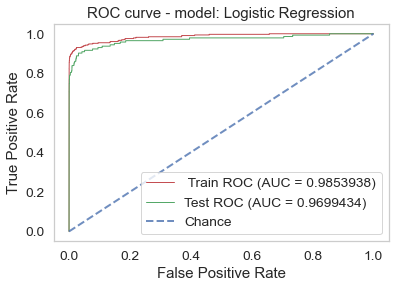

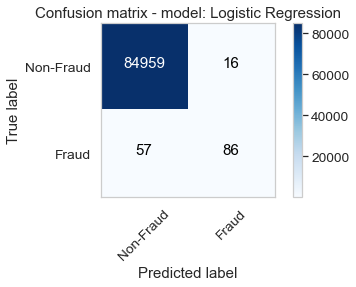

                 Model       AUC  Accuracy  Precision    Recall        F1
0  Logistic Regression  0.969943  0.999142   0.843137  0.601399  0.702041


In [53]:
# Build logistic regression model with default parameter and regular train data
lr_model('Logistic Regression',X_train_pow,y_train,X_test_pow,y_test) 

In [54]:
#LR Hyperparameter tuning
LR_hp_tuning(X_train_pow,y_train)



 Best: 0.983334 using {'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.01}


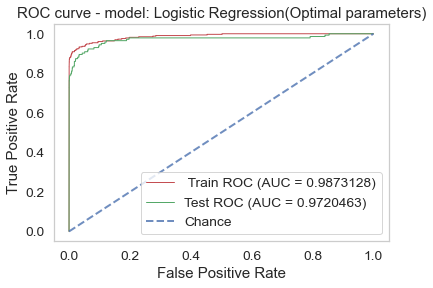

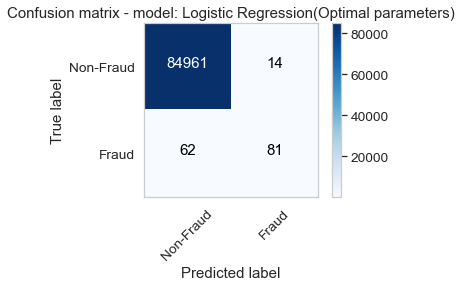

                                     Model       AUC  Accuracy  Precision  \
0  Logistic Regression(Optimal parameters)  0.972046  0.999107   0.852632   

     Recall        F1  
0  0.566434  0.680672  


In [55]:
# Build logistic regression model with optimal parameters
lr_model('BEST',X_train_pow,y_train,X_test_pow,y_test)  

<font color =Blue size=5>  Inference</font>
- For Logistic regression the AUC metric is around 0.9699. Post tuning of hyperparameters there is very minor change in AUC metric - 0.9720(0.15%) , there is not much value add



<font color= Skyblue size = 5> LR model with cross validation for Imbalanced Dataset: </font>

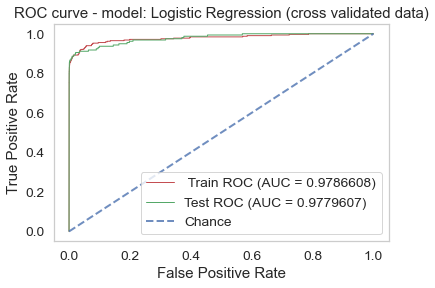

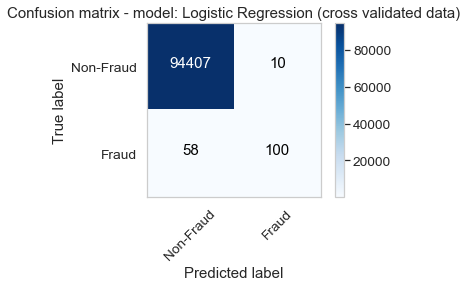

                                        Model       AUC  Accuracy  Precision  \
0  Logistic Regression (cross validated data)  0.977961  0.999281   0.909091   

     Recall        F1  
0  0.632911  0.746269  


In [56]:
# Build logistic regression model with default parameter
lr_model('Logistic Regression (cross validated data)',X_train_cv_pow,y_train_cv,X_test_cv_pow,y_test_cv)

In [57]:
#Hyper Parameter Tuning for Logistic Regression:
LR_hp_tuning(X_train_cv_pow,y_train_cv)


 Best: 0.968314 using {'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.1}


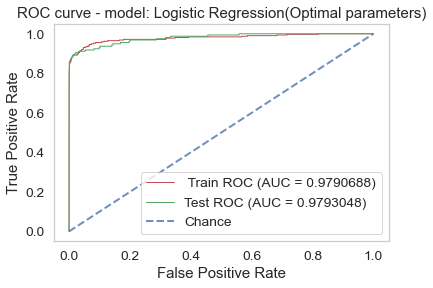

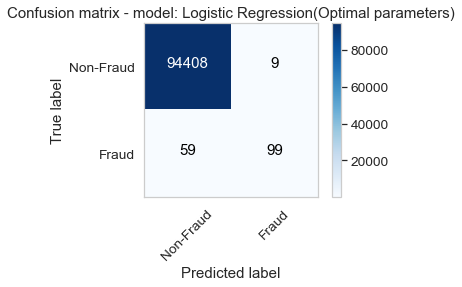

                                     Model       AUC  Accuracy  Precision  \
0  Logistic Regression(Optimal parameters)  0.979305  0.999281   0.916667   

     Recall        F1  
0  0.626582  0.744361  


In [58]:
# Build logistic regression model with best parameters post tuning hyper parameters
lr_model('BEST',X_train_cv_pow,y_train_cv,X_test_cv_pow,y_test_cv)  

<font color =Blue size=5>  Inference</font>
- Post performing cross validation with 3 folds AUC metric for Logistic regression  is around 0.9765. Post tuning of hyperparameters there is not much change in AUC metric - 0.9780. 

- Overall cross validation added around 1% improvement in AUC metric. We will proceed our further analysis with cross validated data only for better models



<font color= Skyblue size = 5> SVM Model Building for Imbalance Dataset: </font>

In [60]:
#Function for SVM Model:
def SVM_model(model,X_train,y_train,X_test,y_test,kernel_pass):   
    classifier=[]
    svm0 = svm.SVC(probability=True,kernel=kernel_pass)
    svm0.fit(X_train, y_train)
    classifier.append([model,svm0])
    plot_CM_and_ROC_curve(classifier, X_train, y_train, X_test, y_test)

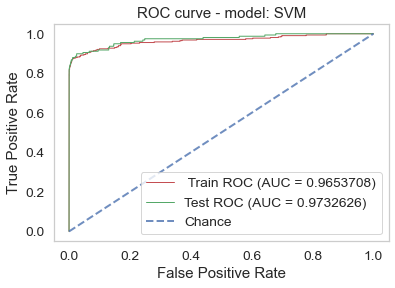

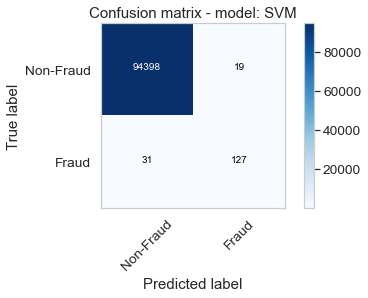

  Model       AUC  Accuracy  Precision    Recall        F1
0   SVM  0.973263  0.999471   0.869863  0.803797  0.835526


In [61]:
#Build SVM Model:
SVM_model('SVM',X_train_cv_pow,y_train_cv,X_test_cv_pow,y_test_cv,'linear')

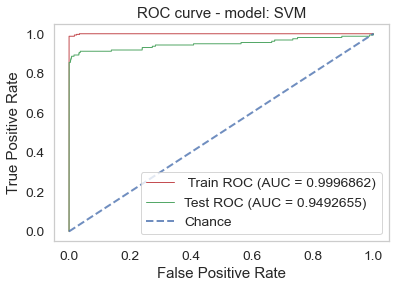

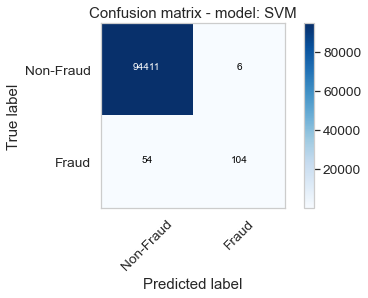

  Model       AUC  Accuracy  Precision    Recall        F1
0   SVM  0.949266  0.999366   0.945455  0.658228  0.776119


In [63]:
#SVM for rbf Kernel:
SVM_model('SVM',X_train_cv_pow,y_train_cv,X_test_cv_pow,y_test_cv,'rbf')

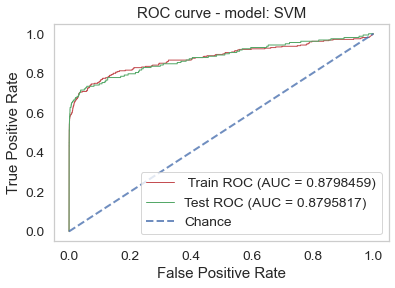

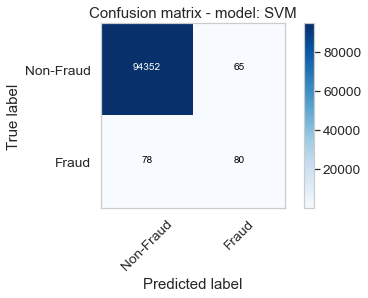

  Model       AUC  Accuracy  Precision    Recall        F1
0   SVM  0.879582  0.998488   0.551724  0.506329  0.528053


In [65]:
#SVM for Sigmoid Kernel:
SVM_model('SVM',X_train_cv_pow,y_train_cv,X_test_cv_pow,y_test_cv,'sigmoid')

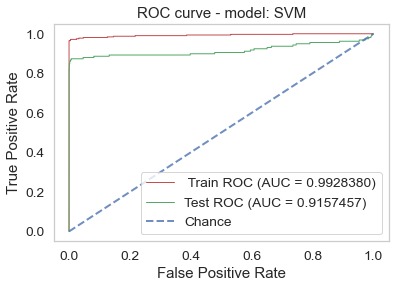

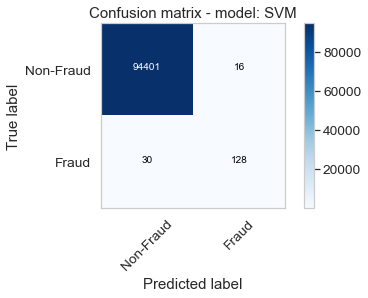

  Model       AUC  Accuracy  Precision    Recall        F1
0   SVM  0.915746  0.999514   0.888889  0.810127  0.847682


In [66]:
#SVM for Poly Kernel:
SVM_model('SVM',X_train_cv_pow,y_train_cv,X_test_cv_pow,y_test_cv,'poly')


<font color = blue size = 5 >Inference:</font>

- Here we can see that AUC & Other Metrics for different SVM kernel's, out of all the linear kernel performs better in all the terms.

- It got the best AUC Score of 0.973263 & accuracy 0.999471 which is pretty close to the 1. the rest of the kernel's are as follows: rbf > sigmoid > poly.

In [67]:
#Hyper parameter Tuning:

svm_hyp = svm.SVC(probability=True) 
svc_params = {'C':[0.01,0.1,1], 'kernel': ['linear'], 'gamma': [0.1,0.25,0.5]}
svm_hyp_model = GridSearchCV(svm_hyp, param_grid=svc_params, n_jobs=-1)
#Learning
svm_hyp_model.fit(X_train_cv_pow,y_train_cv)
#The best hyper parameters set
print("Best Hyper Parameters:\n",svm_hyp_model.best_params_)
#Prediction
prediction=svm_hyp_model.predict(X_test_cv_pow)
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test_cv))

Best Hyper Parameters:
 {'C': 0.01, 'gamma': 0.1, 'kernel': 'linear'}
Accuracy: 0.99949246629659


In [68]:
# Loading the Tuned Model from pickle:
lfp = model_pick(svm_hyp_model)
# Best SVM HyperParameters:
lfp

GridSearchCV(estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1], 'gamma': [0.1, 0.25, 0.5],
                         'kernel': ['linear']})

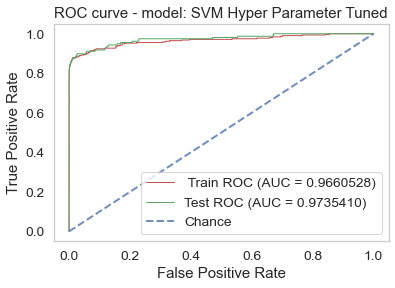

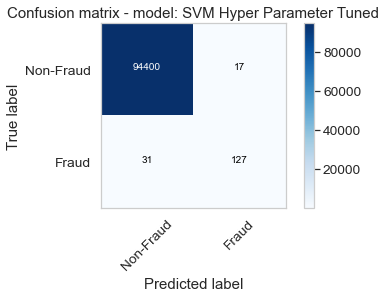

                       Model       AUC  Accuracy  Precision    Recall       F1
0  SVM Hyper Parameter Tuned  0.973541  0.999492   0.881944  0.803797  0.84106


In [69]:
classifier=[]
model = 'SVM Hyper Parameter Tuned'
#Passing the best SVM Hyper parameters to Build the model:
classifier.append([model,lfp])
plot_CM_and_ROC_curve(classifier, X_train_cv_pow, y_train_cv, X_test_cv_pow, y_test_cv)

Finally we pickled. you can access lfp for hyper tuned svm model :)

<font color = blue size = 5 >Inference:</font>

- Post Hyper parameter tuning we got AUC score of 0.9735 which is similar to the AUC Score of base model which is 0.9732



<font color= Skyblue size = 5> Decision Tree Classifier for Imbalanced Dataset: </font>

In [70]:
# Define a function to build Decision Tree model
def DT_model(model,X_train,y_train,X_test,y_test):
    
    classifier=[]
    if model == 'BEST':
        model='Decision Tree(Optimal parameters) '
        dt0=tree.best_estimator_
    else:
        dt0 = DecisionTreeClassifier(random_state=33)
    dt0.fit(X_train, y_train)
    classifier.append([model,dt0])
    plot_CM_and_ROC_curve(classifier, X_train, y_train, X_test, y_test)

In [79]:
# Function to Tune Decision Hyper Parameters:
def DT_hp_tuning1(param,X_train,y_train):

# parameters to build the model on
    if param == 'max_depth':
        parameters = {'max_depth': range(5,20,5)}
    elif param == 'min_samples_leaf':
        parameters = {
                      'min_samples_leaf': range(10,60,10)
                     }
    else:
        parameters = {
                      'min_samples_split': range(20, 200, 20)
                     }
    dtree=DecisionTreeClassifier(random_state=33)
    
# fit tree on training data
    tree = RandomizedSearchCV(dtree, parameters, 
                      cv=cv1, 
                    scoring="roc_auc",return_train_score=True,n_jobs=-1,random_state=33)
    tree.fit(X_train, y_train)
    scores = tree.cv_results_
    pd.DataFrame(scores).head()
    
# plotting accuracies with min_samples_split
    plt.figure()
    if param == 'min_samples_split':
        plt.plot(scores["param_min_samples_split"], 
            scores["mean_train_score"], 
            label="training accuracy")
        plt.plot(scores["param_min_samples_split"], 
            scores["mean_test_score"], 
            label="test accuracy")
        plt.xlabel("min_samples_split")
        
# plotting accuracies with max_depth
    elif param == 'max_depth':
        plt.plot(scores["param_max_depth"], 
            scores["mean_train_score"], 
            label="training accuracy")
        plt.plot(scores["param_max_depth"], 
            scores["mean_test_score"], 
            label="test accuracy")
        plt.xlabel("max_depth")
    else:
# plotting accuracies with min_samples_leaf
        plt.plot(scores["param_min_samples_leaf"], 
            scores["mean_train_score"], 
            label="training accuracy")
        plt.plot(scores["param_min_samples_leaf"], 
            scores["mean_test_score"], 
            label="test accuracy")
        plt.xlabel("min_samples_leaf")

    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

In [73]:
# Create the parameter for RandomSearchCV with a fine tuned range for each parameter in Decision Tree
def DT_final_tuning (X_train,y_train):   
    global tree
    param_ = {
        'max_depth': [5,20],
        'min_samples_leaf':[30,40,60],
        'min_samples_split': [75,100,125],
        'criterion': ["entropy", "gini"]
    }


    # Instantiate the RandomSearchCV model
    dtree = DecisionTreeClassifier(random_state=33)
    tree = RandomizedSearchCV(estimator = dtree, param_distributions = param_, 
                              cv = cv1, n_jobs=-1,scoring="roc_auc",random_state=33)

    # Fit the train data over Hyper parameters:
    tree.fit(X_train, y_train)

# Final Tuning for narrowing down the Hyper Parameters for Decision Tree:
def DT_hp_tuning(X_train,y_train) :
    DT_hp_tuning1('max_depth',X_train,y_train)
    DT_hp_tuning1('min_samples_leaf',X_train,y_train)
    DT_hp_tuning1('min_samples_split',X_train,y_train)

   

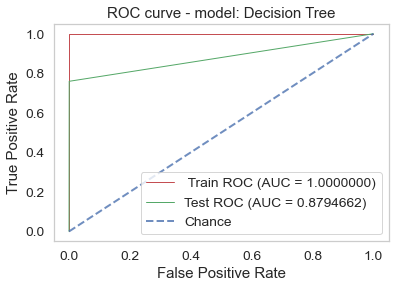

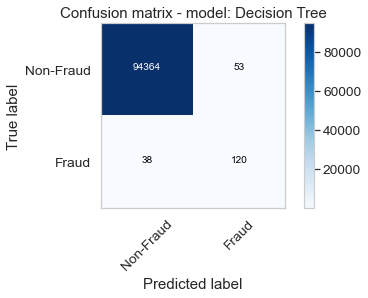

           Model       AUC  Accuracy  Precision    Recall        F1
0  Decision Tree  0.879466  0.999038   0.693642  0.759494  0.725076


In [74]:
 # Build decision tree with all default parameters:
DT_model('Decision Tree',X_train_cv_pow,y_train_cv,X_test_cv_pow,y_test_cv) 

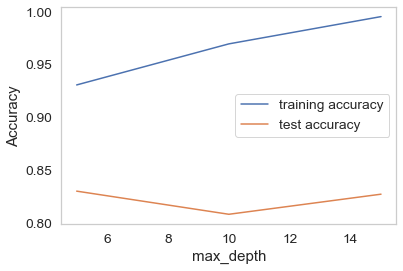

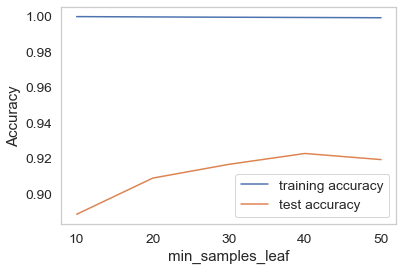

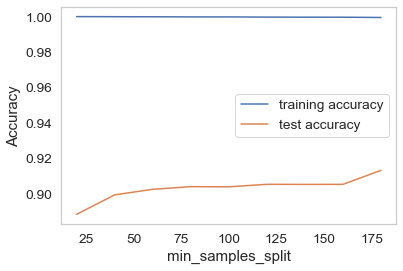

In [80]:
#Decision Tree Hyper Parameter Tuning:
DT_hp_tuning(X_train_cv_pow,y_train_cv)

In [81]:
# Create the parameter for RandomSearchCV with a fine tuned range for each parameter in Decision Tree
param_ = {
    'max_depth': [5,20],
    'min_samples_leaf':[30,40,60],
    'min_samples_split': [75,100,125],
    'criterion': ["entropy", "gini"]
}


# Instantiate the RandomSearchCV model
dtree = DecisionTreeClassifier(random_state=33)
tree = RandomizedSearchCV(estimator = dtree, param_distributions = param_, 
                          cv = cv1, n_jobs=-1,scoring="roc_auc",random_state=33)

# Fit the train data over Hyper parameters:
tree.fit(X_train_cv_pow, y_train_cv)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=33),
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [5, 20],
                                        'min_samples_leaf': [30, 40, 60],
                                        'min_samples_split': [75, 100, 125]},
                   random_state=33, scoring='roc_auc')

In [82]:
#Decision Tree Hyperparameter Scores:
print('Auc Score For Decision Tree is: ',tree.best_score_,'with these Hyper Parameters: ',tree.best_params_)

Auc Score For Decision Tree is:  0.9385918584653224 with these Hyper Parameters:  {'min_samples_split': 100, 'min_samples_leaf': 40, 'max_depth': 5, 'criterion': 'entropy'}


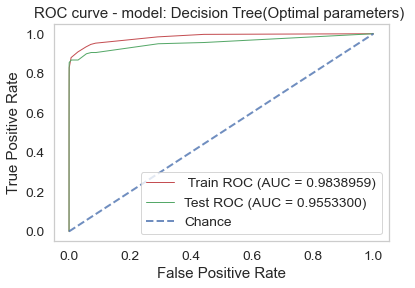

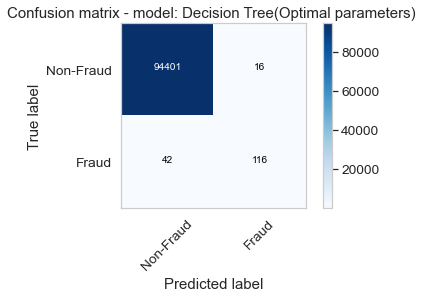

                                Model      AUC  Accuracy  Precision    Recall  \
0  Decision Tree(Optimal parameters)   0.95533  0.999387   0.878788  0.734177   

    F1  
0  0.8  


In [83]:
#Running Decision Tree with Best parameters
DT_model('BEST',X_train_cv_pow,y_train_cv,X_test_cv_pow,y_test_cv) 

<font color = Blue size = 5>Inference:</font>

- Decision Tree the AUC metric is around 0.8709. Post tuning of hyperparameters there is significant change in AUC metric : 0.9553(8.3%)


<font color= Skyblue size = 5> RandomForest Classifier for Imbalanced Dataset: </font>

In [84]:
#Function to Build RFC Model:
def rfc_model(model,X_train,y_train,X_test,y_test) :
    classifier=[]
    if model == 'BEST':
        model='Random forest(Best hyper parameters)'
        rfc=clf_rfc_cv.best_estimator_
    else:
        rfc = RandomForestClassifier(n_jobs=-1, random_state=33)
    rfc.fit(X_train, y_train)
    classifier.append([model,rfc])
    plot_CM_and_ROC_curve(classifier, X_train, y_train, X_test, y_test)
    

In [85]:
#Function to narrow down the Hyper parameters range in RFC Model:
def rfc_hp_tuning1(param,X_train,y_train):
# parameters to build the model on
    if param == 'n_estimators':
        parameters = {'n_estimators': [100,150]
                  }
    elif param == 'max_depth':
        parameters = {
                  'max_depth': range(5,20,5)
                  }
    elif param == 'min_samples_leaf':
        parameters = {
                  'min_samples_leaf': range(20,100, 20)
                   }
    else:
        parameters = {
                  'min_samples_split': range(50,150,50)
                  }
    rfc=RandomForestClassifier(random_state=33)
# fit tree on training data
    rfc_r = RandomizedSearchCV(rfc, parameters, 
                      cv=cv1, 
                    scoring="roc_auc",return_train_score=True,n_jobs=-1,random_state=33)
    rfc_r.fit(X_train, y_train)
    scores = rfc_r.cv_results_
    pd.DataFrame(scores).head()
    # plotting accuracies with n_estimators
    plt.figure()
    if param == 'n_estimators' :
        plt.plot(scores["param_n_estimators"], 
                scores["mean_train_score"], 
                label="training accuracy")
        plt.plot(scores["param_n_estimators"], 
                scores["mean_test_score"], 
                label="test accuracy")
        plt.xlabel("n_estimators")
    elif param == 'min_samples_split':
        plt.plot(scores["param_min_samples_split"], 
        scores["mean_train_score"], 
        label="training accuracy")
        plt.plot(scores["param_min_samples_split"], 
        scores["mean_test_score"], 
        label="test accuracy")
        plt.xlabel("min_samples_split")
  # plotting accuracies with max_depth
    elif param == 'max_depth':
        plt.plot(scores["param_max_depth"], 
                scores["mean_train_score"], 
                label="training accuracy")
        plt.plot(scores["param_max_depth"], 
                scores["mean_test_score"], 
                label="test accuracy")
        plt.xlabel("max_depth")
    else:
# plotting accuracies with min_samples_leaf
        plt.plot(scores["param_min_samples_leaf"], 
                scores["mean_train_score"], 
                label="training accuracy")
        plt.plot(scores["param_min_samples_leaf"], 
                scores["mean_test_score"], 
                label="test accuracy")
        plt.xlabel("min_samples_leaf")

    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

In [86]:
#Fine tuned Hyper parameters for RFC Model:
def rfc_hpf_tuning(X_train,y_train):
    rfc_hp_tuning1('n_estimators',X_train,y_train)
    rfc_hp_tuning1('max_depth',X_train,y_train)
    rfc_hp_tuning1('min_samples_leaf',X_train,y_train)
    rfc_hp_tuning1('min_samples_split',X_train,y_train)
    

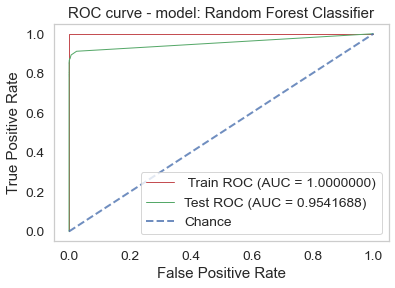

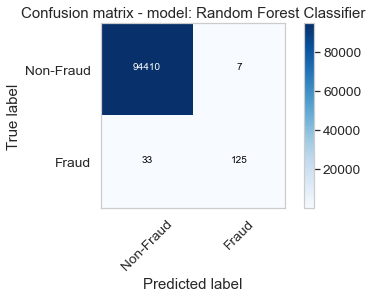

                      Model       AUC  Accuracy  Precision    Recall        F1
0  Random Forest Classifier  0.954169  0.999577    0.94697  0.791139  0.862069


In [87]:
# Random Forest Model Building with default parameters:
rfc_model('Random Forest Classifier',X_train_cv_pow,y_train_cv,X_test_cv_pow,y_test_cv)

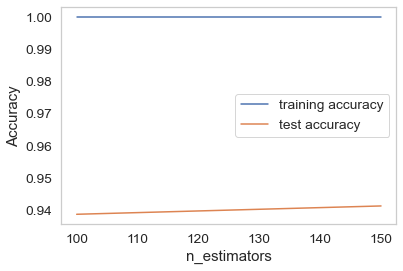

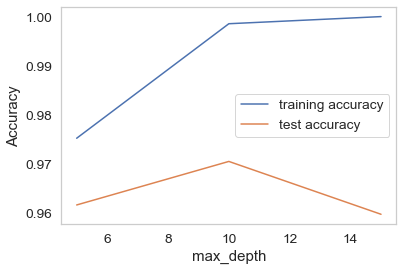

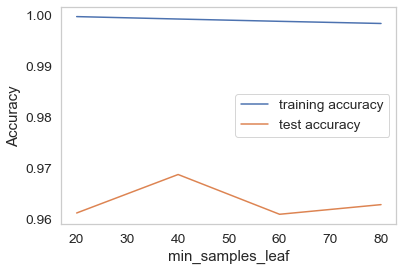

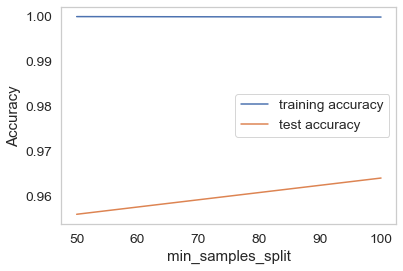

In [88]:
# Random Forest Model Hyper Parameter Tuning to narrow down parameters:
rfc_hpf_tuning(X_train_cv_pow,y_train_cv) 

In [90]:
#Function for Hyper parameter tuning in RFC Model:
from sklearn.model_selection import RandomizedSearchCV
def rfc_hp_tuning(X_train,y_train):
    global clf_rfc_cv
    param = {'n_estimators': [100,150], 'max_depth': [10,15]
          , 'min_samples_leaf':[40,80],'min_samples_split':[80,100,150]}
    rfc = RandomForestClassifier(n_jobs=-1, random_state=33)
    clf_rfc_cv = RandomizedSearchCV(rfc, param, cv=cv1,scoring='roc_auc', n_jobs=-1,random_state=33)
    clf_rfc_cv.fit(X_train,y_train)

    print("tuned hpyerparameters :(best parameters) ",clf_rfc_cv.best_params_)
    print("accuracy :",clf_rfc_cv.best_score_)


In [91]:
# Random Forest Model Final Hyper Parameter tuning:
rfc_hp_tuning(X_train_cv_pow,y_train_cv)

tuned hpyerparameters :(best parameters)  {'n_estimators': 150, 'min_samples_split': 100, 'min_samples_leaf': 40, 'max_depth': 15}
accuracy : 0.9749349291465513


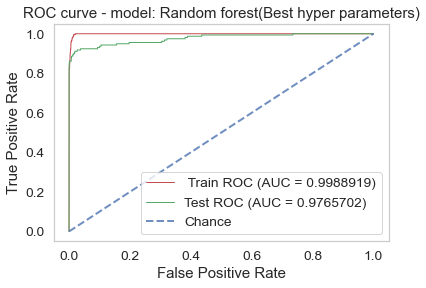

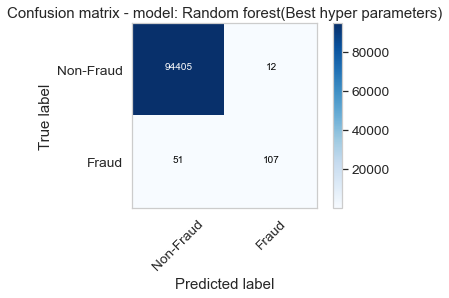

                                  Model      AUC  Accuracy  Precision  \
0  Random forest(Best hyper parameters)  0.97657  0.999334    0.89916   

     Recall        F1  
0  0.677215  0.772563  


In [92]:
# Random Forest Model Building with Best Hyper Parameters:
rfc_model('BEST',X_train_cv_pow,y_train_cv,X_test_cv_pow,y_test_cv)

For Random forest the AUC metric is around 0.9373. Post tuning of hyperparameters there is significant change in AUC metric 0.9699(3.3%)


<font color= Skyblue size = 5> XGBoost Classifier for Data Imbalancing : </font>

In [96]:
from xgboost import XGBClassifier 
# XG Boost Model function:
def xgb_model(model,X_train,y_train,X_test,y_test) :
    classifier=[]
    if model == 'BEST':
        model='XG Boost(Best hyper parameters)'
        xgb=clf_xgb_cv.best_estimator_
    else:
        xgb = XGBClassifier(n_jobs=-1, random_state=33)
    
    xgb.fit(X_train, y_train)
    classifier.append([model,xgb])
    plot_CM_and_ROC_curve(classifier, X_train, y_train, X_test, y_test)
    

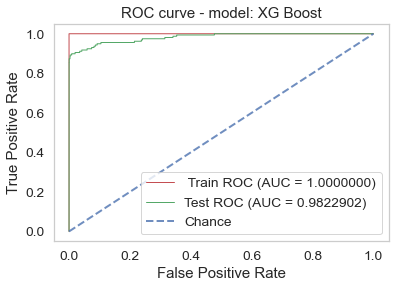

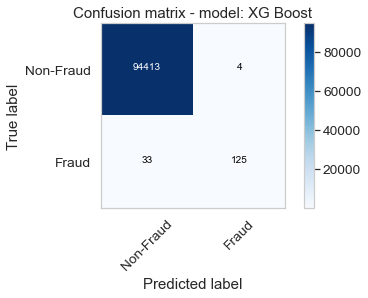

      Model      AUC  Accuracy  Precision    Recall       F1
0  XG Boost  0.98229  0.999609   0.968992  0.791139  0.87108


In [97]:
# XG Boost Model Building:
xgb_model('XG Boost',X_train_cv_pow,y_train_cv,X_test_cv_pow,y_test_cv)

In [98]:
# XGBoost Hyper Parameter tuning function:
def xgb_hp_tuning(X_train,y_train):
    global clf_xgb_cv
    #XGBoost classifier:
    xgbst = XGBClassifier()

    param_xgb = {'n_estimators': [130,140,150],
                  'max_depth': [3, 5, 7],
                   'min_child_weight':[1,2,3]
                 } 

    clf_xgb_cv = RandomizedSearchCV(xgbst, param_xgb, cv=3,scoring='roc_auc', n_jobs=-1,random_state=33)
    clf_xgb_cv.fit(X_train,y_train)

    print("tuned hpyerparameters :(best parameters) ",clf_xgb_cv.best_params_)
    print("accuracy :",clf_xgb_cv.best_score_)

In [99]:
# XG Boost Model Best Hyper Parameters:
xgb_hp_tuning(X_train_cv_pow,y_train_cv)

tuned hpyerparameters :(best parameters)  {'n_estimators': 150, 'min_child_weight': 2, 'max_depth': 3}
accuracy : 0.9773766784839335


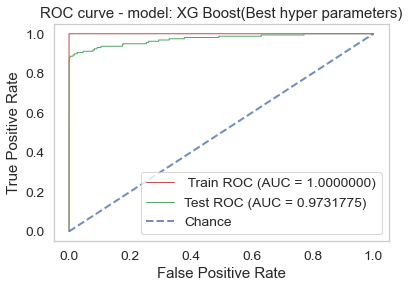

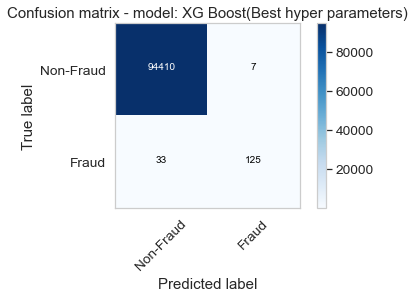

                             Model       AUC  Accuracy  Precision    Recall  \
0  XG Boost(Best hyper parameters)  0.973177  0.999577    0.94697  0.791139   

         F1  
0  0.862069  


In [100]:
#XG Boost Model Building with Best Hyper Parameters:
xgb_model('BEST',X_train_cv_pow,y_train_cv,X_test_cv_pow,y_test_cv)

<font size = 5 color= Blue> Inference </font>

- For XG Boost the AUC metric is around 0.9822. Post tuning of hyperparameters there is no significant change in AUC metric: 0.9780 which is a dip.

 <font color= Skyblue size = 5> KNN for Data Imbalancing : </font>


In [ ]:
#Function for KNN Model building:
#Note - This model take couple of hours, so better to avoid re-run.
#create new a knn model
knn2 = KNeighborsClassifier() 
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 11)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=cv1,n_jobs=-1)
#fit model to data 
#knn_gscv.fit(X_train_cv_pow,y_train_cv)

knn_gscv.best_params_

knn_gscv.best_estimator_

knn_model('BEST', X_train_cv_pow, y_train_cv, X_test_cv_pow, y_test_cv)def knn_model(model,X_train,y_train,X_test,y_test) :
    classifier=[]
    if model == 'BEST':
        model='KNN Model(Optimal parameters) '
        knn = knn_gscv.best_estimator_
    else:
        knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    classifier.append([model,knn])
    plot_CM_and_ROC_curve(classifier, X_train, y_train, X_test, y_test)
    classifier=[]
    
  
    #knn_final.fit(X_train,y_train)
    classifier.append([model,knn])

    plot_CM_and_ROC_curve(classifier, X_train, y_train, X_test, y_test)

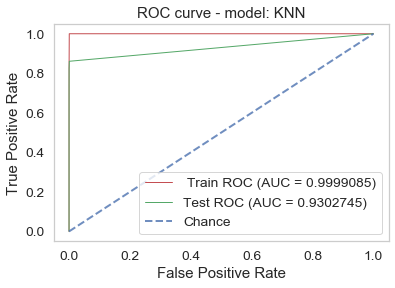

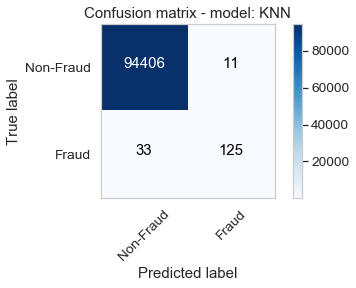

  Model       AUC  Accuracy  Precision    Recall       F1
0   KNN  0.930275  0.999535   0.919118  0.791139  0.85034


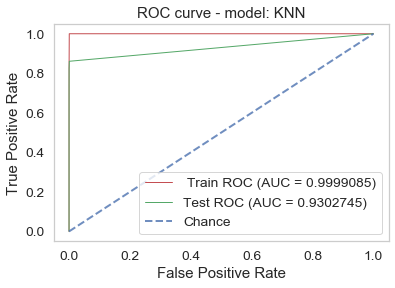

In [ ]:
knn_model('KNN', X_train_cv_pow, y_train_cv, X_test_cv_pow, y_test_cv)

In [112]:
#create new a knn model
knn2 = KNeighborsClassifier() 
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 11)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=cv1,n_jobs=-1)
#fit model to data 
#knn_gscv.fit(X_train_cv_pow,y_train_cv)

knn_gscv.best_params_

{'n_neighbors': 3}

In [113]:
knn_gscv.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

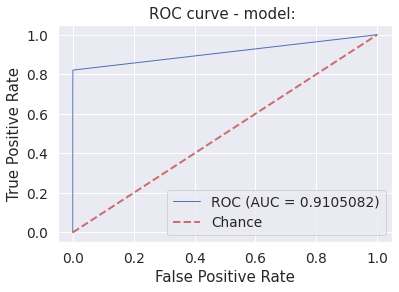

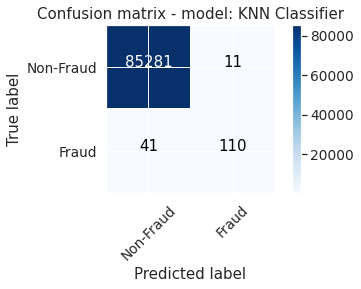

            Model       AUC  Accuracy  Precision    Recall        F1
0  KNN Classifier  0.910508  0.999391   0.909091  0.728477  0.808824


Model       AUC  Accuracy  Precision    Recall        F1
0  KNN Classifier  0.910508  0.999391   0.909091  0.728477  0.808824

In [73]:
knn_model('BEST', X_train_cv_pow, y_train_cv, X_test_cv_pow, y_test_cv)

<font size = 5 color= Blue> Inference </font>

- For KNN the AUC metric is around 0.8984. Post tuning of hyperparameters there is slight change in AUC metric which is: 0.9105.

<font color= SkyBlue size = 5> Data Balancing Techniques: </font>

- Here we have Highly Imbalance dataset, we are going to perform the 4 different balancing techniques : 

1. RANDOM UNDER SAMPLING
2. RANDOM OVER SAMPLING
3. SMOTE
4. ADASYN


<font color= Violet size = 5> SMOTE Technique for Data balancing : </font>

In [109]:
# Functions to build/tune/plot the Models for both Baseline & Tuned one's:

#Function of Base Models for SMOTE dataset:
def base_models(model,X_train,y_train,X_test,y_test):
    lr_model('Logistic regression:'+model,X_train,y_train,X_test,y_test) 
    DT_model('Decision Tree: '+model,X_train,y_train,X_test,y_test) 
    rfc_model('Random Forest: '+ model,X_train,y_train,X_test,y_test) 
    xgb_model('XG Boost: ' +model,X_train,y_train,X_test,y_test)
    
#Function of Hyper Parameter Tuning the Models for SMOTE dataset:
def hp_tuning(X_train,y_train):
    print('LR hyper parameter tuning')
    LR_hp_tuning(X_train,y_train)
    print('DT hyper parameter tuning')
    DT_hp_tuning(X_train,y_train)
    DT_final_tuning (X_train,y_train)
    print('RF hyper parameter tuning')
    rfc_hp_tuning(X_train,y_train)
    print('XG Boost hyper parameter tuning')
    xgb_hp_tuning(X_train,y_train)     
    
#Function of Hyper Parameter Tuned Models for SMOTE dataset:
def tuned_models(model,X_train,y_train,X_test,y_test):
    lr_model(model,X_train,y_train,X_test,y_test) 
    DT_model(model,X_train,y_train,X_test,y_test) 
    rfc_model(model,X_train,y_train,X_test,y_test) 
    xgb_model(model,X_train,y_train,X_test,y_test)

In [110]:

### After applying SMOTE 
#random.seed(33)
sm = SMOTE(random_state=33)
X_train_smote_pow, y_train_smote = sm.fit_resample(X_train_cv_pow, y_train_cv)
X_test_smote_pow, y_test_smote = sm.fit_resample(X_test_cv_pow, y_test_cv)


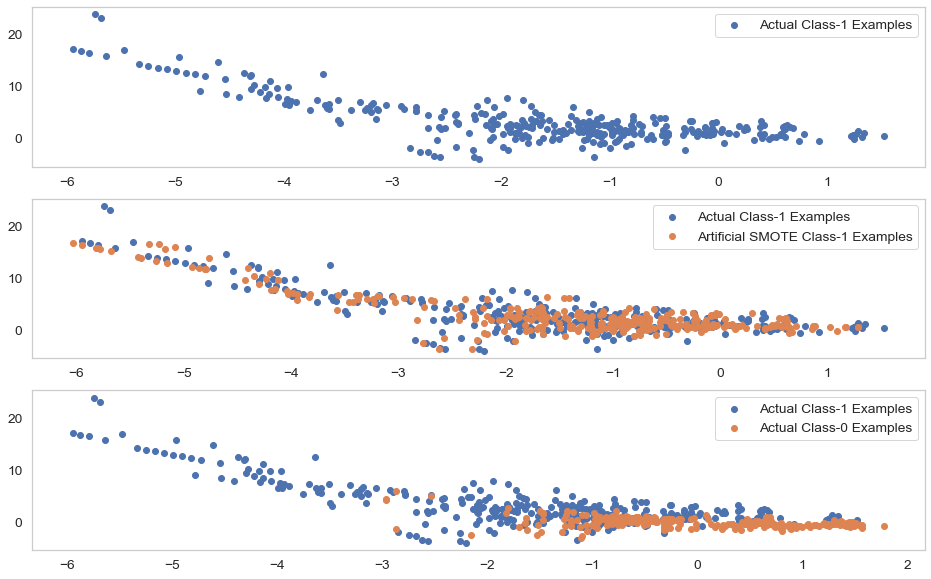

In [111]:
X_train_smote_2 = X_train_smote_pow[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]
X_train_smote_1 = X_train_smote_2.to_numpy()

plt.rcParams['figure.figsize'] = [16, 10]
fig = plt.figure()

# Plotting Actual Fraud data distribution.
plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()


# Plotting data distribution with SMOTE vs Without SMOTE.
plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],label='Artificial SMOTE Class-1 Examples')
plt.legend()


# Plotting data distribution among Fraud vs Non-Fraud.
plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()
plt.rcParams['figure.figsize'] = [10,8]

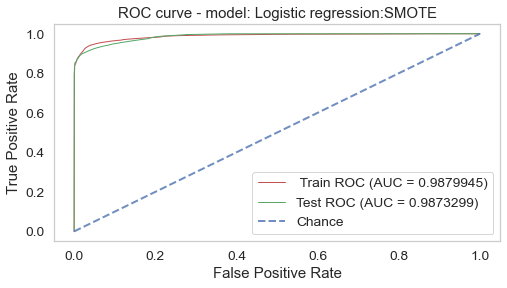

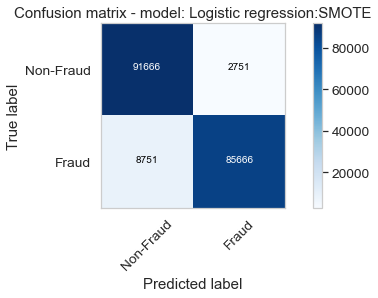

                       Model      AUC  Accuracy  Precision    Recall       F1
0  Logistic regression:SMOTE  0.98733  0.939089   0.968886  0.907315  0.93709


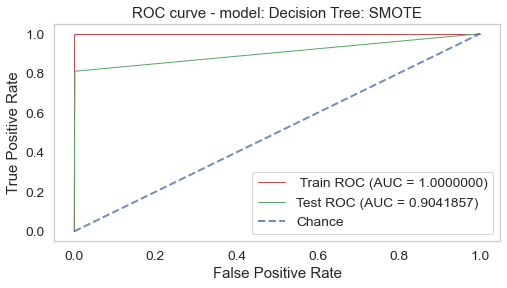

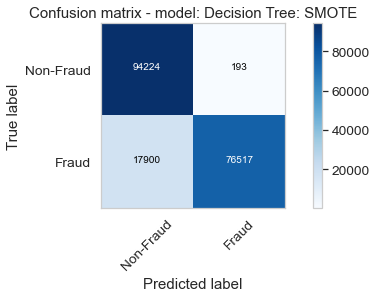

                  Model       AUC  Accuracy  Precision    Recall        F1
0  Decision Tree: SMOTE  0.904186  0.904186   0.997484  0.810415  0.894272


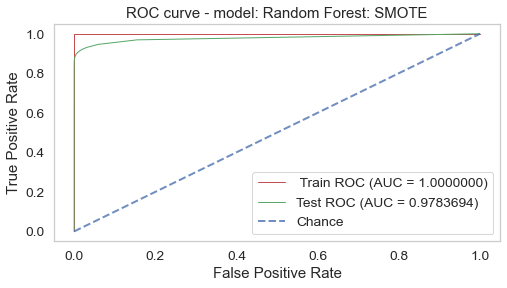

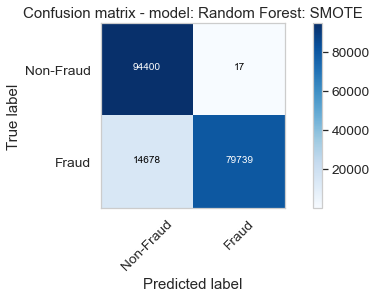

                  Model       AUC  Accuracy  Precision    Recall       F1
0  Random Forest: SMOTE  0.978369   0.92218   0.999787  0.844541  0.91563


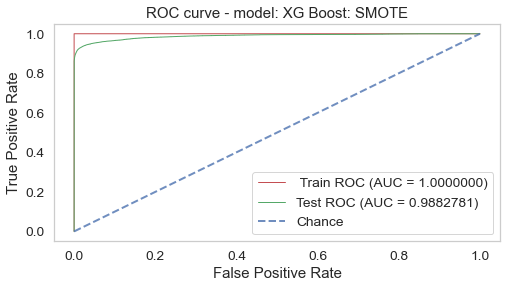

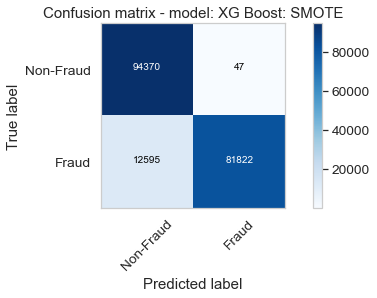

             Model       AUC  Accuracy  Precision    Recall        F1
0  XG Boost: SMOTE  0.988278  0.933052   0.999426  0.866602  0.928287


In [112]:
#SMOTE Base Models:
plt.rcParams['figure.figsize'] = [8,4]
base_models('SMOTE',X_train_smote_pow,y_train_smote,X_test_smote_pow,y_test_smote)


LR hyper parameter tuning

 Best: 0.985305 using {'solver': 'lbfgs', 'penalty': 'l2', 'C': 100}
DT hyper parameter tuning


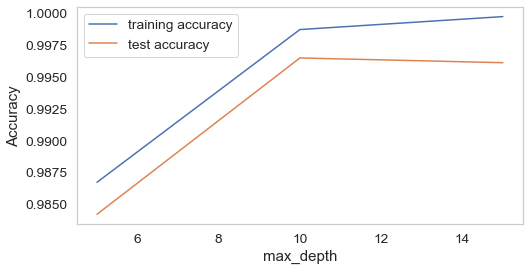

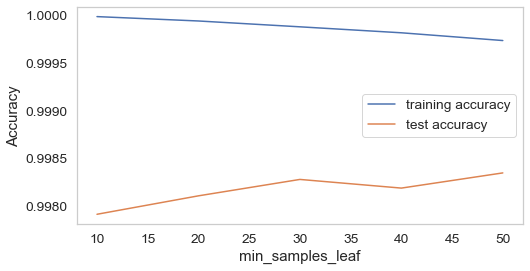

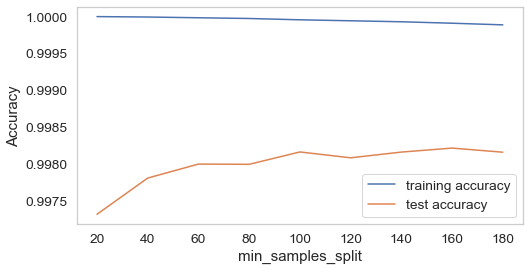

RF hyper parameter tuning
tuned hpyerparameters :(best parameters)  {'n_estimators': 150, 'min_samples_split': 100, 'min_samples_leaf': 40, 'max_depth': 15}
accuracy : 0.9998406502973213
XG Boost hyper parameter tuning
tuned hpyerparameters :(best parameters)  {'n_estimators': 140, 'min_child_weight': 1, 'max_depth': 7}
accuracy : 0.9999156006068378


In [113]:
#Hyper parameter Tuning for all models with SMOTE Dataset:
hp_tuning(X_train_smote_pow,y_train_smote)

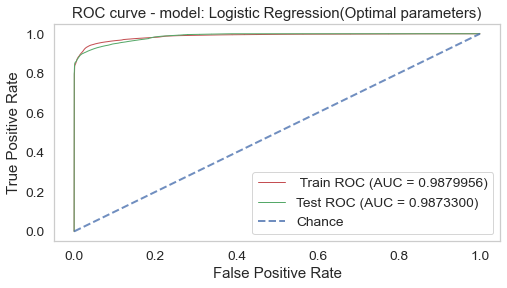

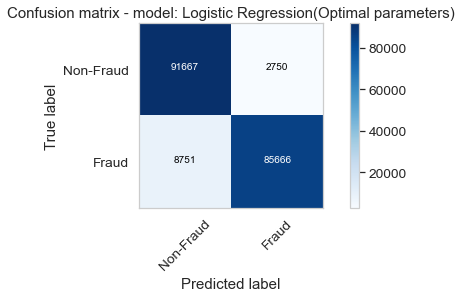

                                     Model      AUC  Accuracy  Precision  \
0  Logistic Regression(Optimal parameters)  0.98733  0.939095   0.968897   

     Recall        F1  
0  0.907315  0.937096  


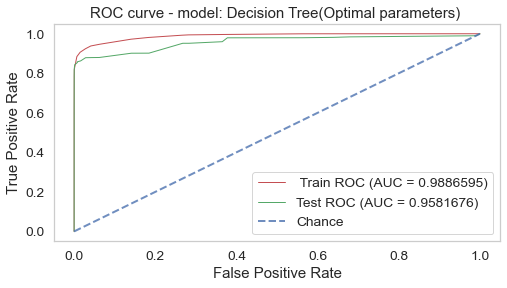

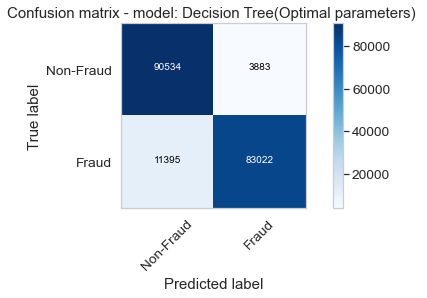

                                Model       AUC  Accuracy  Precision  \
0  Decision Tree(Optimal parameters)   0.958168  0.919093   0.955319   

     Recall        F1  
0  0.879312  0.915741  


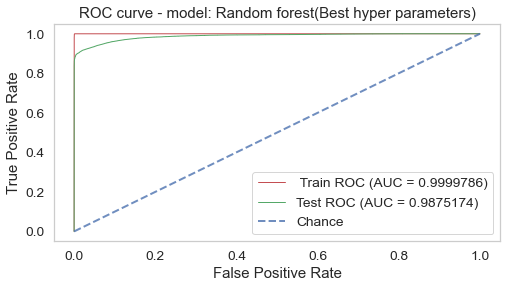

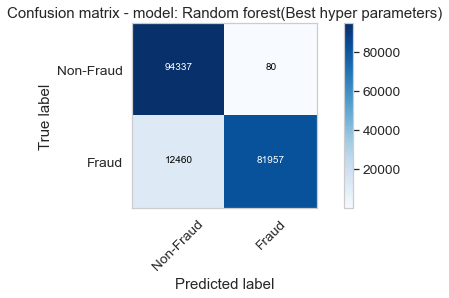

                                  Model       AUC  Accuracy  Precision  \
0  Random forest(Best hyper parameters)  0.987517  0.933592   0.999025   

     Recall        F1  
0  0.868032  0.928933  


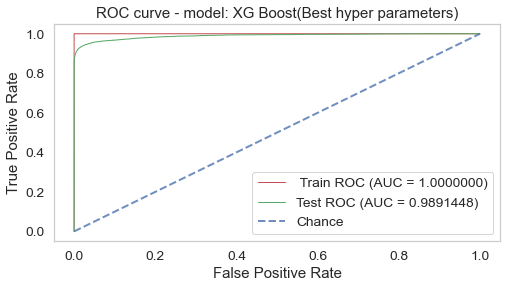

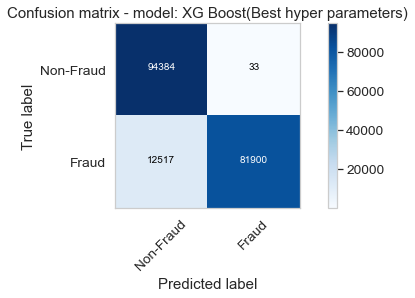

                             Model       AUC  Accuracy  Precision    Recall  \
0  XG Boost(Best hyper parameters)  0.989145   0.93354   0.999597  0.867429   

         F1  
0  0.928835  


In [114]:
#Hyper parameter Tuned Models for SMOTE Dataset:
tuned_models('BEST',X_train_smote_pow,y_train_smote,X_test_smote_pow,y_test_smote)

<font color ='blue' size = 5> Inference: </font>
    
    


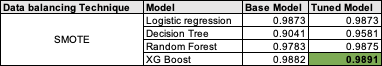



<font color= Violet size = 5> RandomUnderSampler for Data balancing : </font>

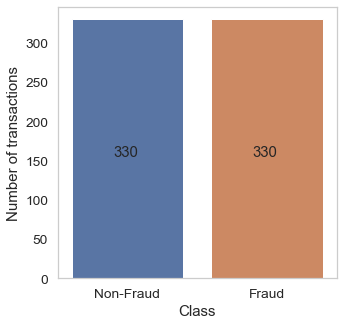

In [ ]:
#plottiing RandomUnderSampler Data Distribution (RUS):
rus = RandomUnderSampler(sampling_strategy='auto', random_state=33)
X_rus, y_rus = rus.fit_resample(X_train, y_train)
plt.figure(figsize=(5,5))
sns.barplot(x = ['Non-Fraud','Fraud'], y = [Counter(y_rus)[0], Counter(y_rus)[1]])
plt.xlabel('Class')
plt.ylabel('Number of transactions')

plt.annotate('{}'.format(Counter(y_rus)[0]), (0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}'.format(Counter(y_rus)[1]), (0.70, 0.45), xycoords='axes fraction')
plt.show()


In [ ]:
#Post RUS data splitting:
X_train_rus,y_train_rus=rus.fit_resample(X_train_cv_pow,y_train_cv)
X_test_rus,y_test_rus=rus.fit_resample(X_test_cv_pow,y_test_cv)

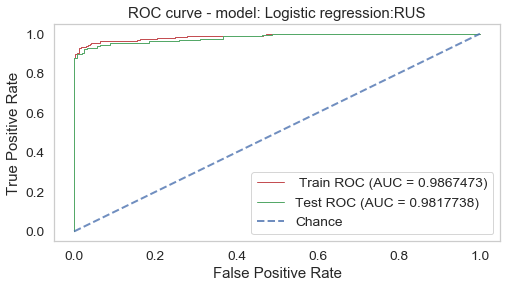

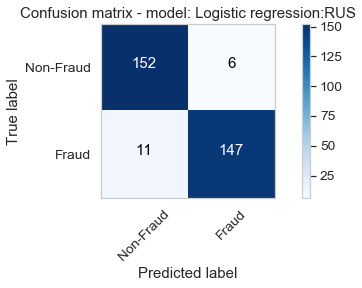

                     Model       AUC  Accuracy  Precision   Recall        F1
0  Logistic regression:RUS  0.981774  0.946203   0.960784  0.93038  0.945338


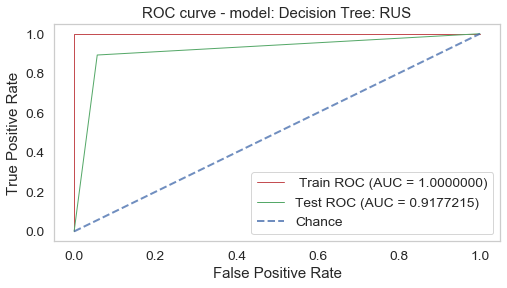

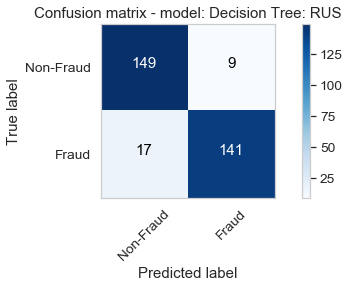

                Model       AUC  Accuracy  Precision    Recall        F1
0  Decision Tree: RUS  0.917722  0.917722       0.94  0.892405  0.915584


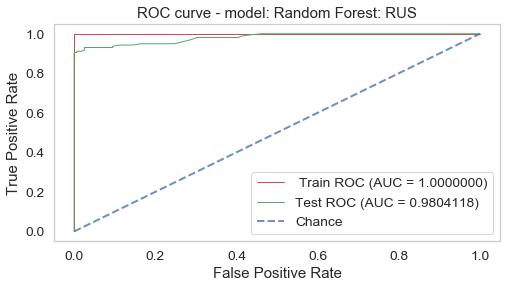

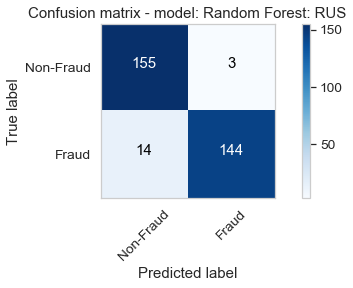

                Model       AUC  Accuracy  Precision    Recall        F1
0  Random Forest: RUS  0.980412  0.946203   0.979592  0.911392  0.944262


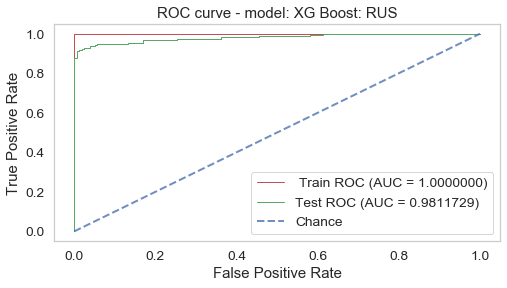

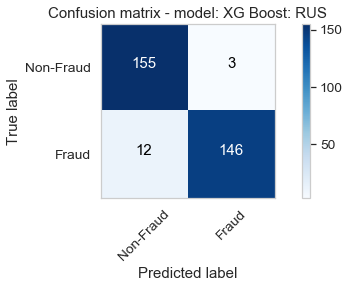

           Model       AUC  Accuracy  Precision    Recall       F1
0  XG Boost: RUS  0.981173  0.952532   0.979866  0.924051  0.95114


In [ ]:
#Building Base Models on RandomUnder Sampler dataset:
base_models('RUS',X_train_rus,y_train_rus,X_test_rus,y_test_rus)

LR hyper parameter tuning

 Best: 0.963749 using {'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.01}
DT hyper parameter tuning


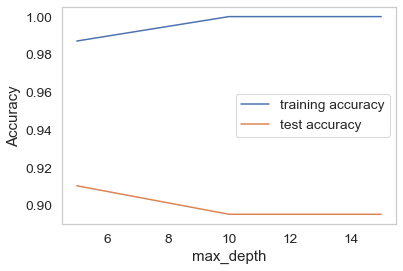

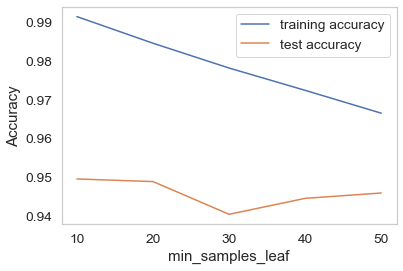

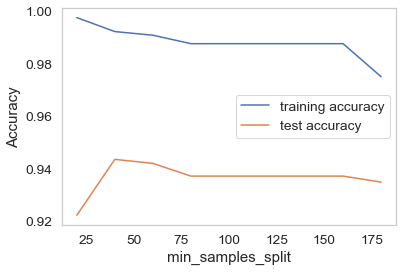

RF hyper parameter tuning
tuned hpyerparameters :(best parameters)  {'n_estimators': 150, 'min_samples_split': 100, 'min_samples_leaf': 40, 'max_depth': 15}
accuracy : 0.9712471655328798
XG Boost hyper parameter tuning
tuned hpyerparameters :(best parameters)  {'n_estimators': 130, 'min_child_weight': 1, 'max_depth': 3}
accuracy : 0.9783219954648525


In [76]:
#Hyper Parameter Tuning for all the Models on RandomUnder Sampler dataset:
hp_tuning(X_train_rus,y_train_rus)

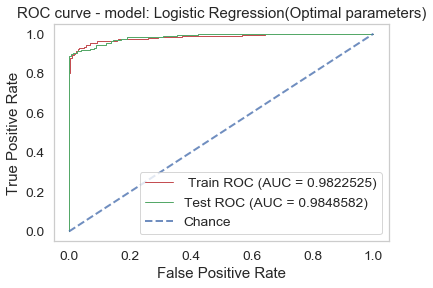

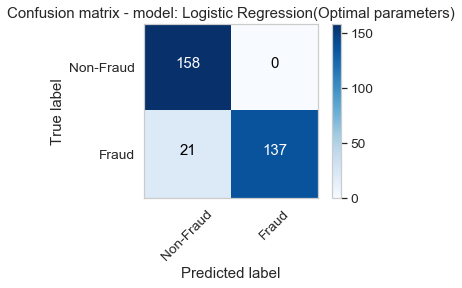

                                     Model       AUC  Accuracy  Precision  \
0  Logistic Regression(Optimal parameters)  0.984858  0.933544        1.0   

     Recall        F1  
0  0.867089  0.928814  


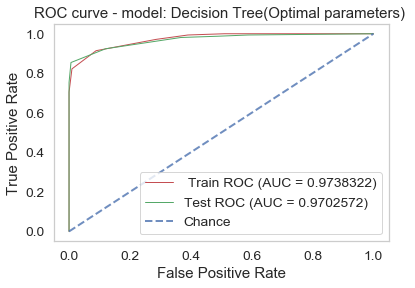

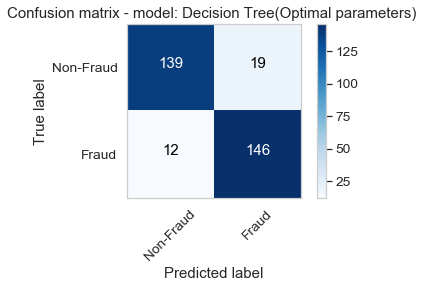

                                Model       AUC  Accuracy  Precision  \
0  Decision Tree(Optimal parameters)   0.970257  0.901899   0.884848   

     Recall        F1  
0  0.924051  0.904025  


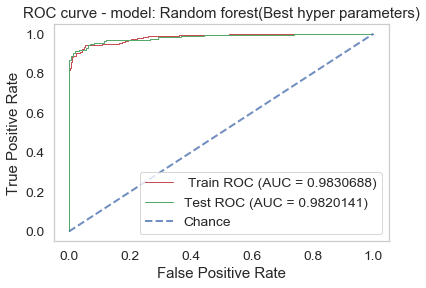

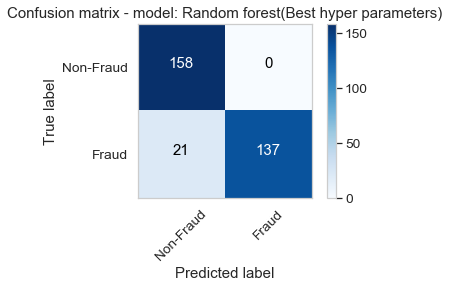

                                  Model       AUC  Accuracy  Precision  \
0  Random forest(Best hyper parameters)  0.982014  0.933544        1.0   

     Recall        F1  
0  0.867089  0.928814  


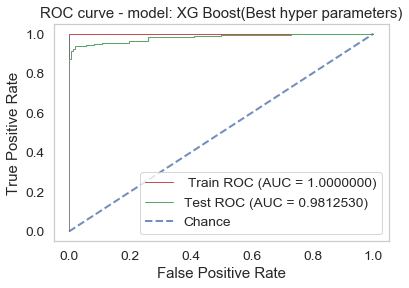

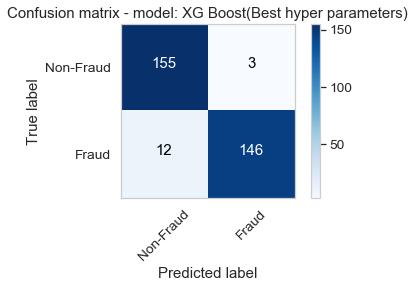

                             Model       AUC  Accuracy  Precision    Recall  \
0  XG Boost(Best hyper parameters)  0.981253  0.952532   0.979866  0.924051   

        F1  
0  0.95114  


In [77]:
#Hyper Parameter Tuned Models on RandomUnder Sampler dataset:
tuned_models('BEST',X_train_rus,y_train_rus,X_test_rus,y_test_rus)

<font color = 'Blue' size =5> Inference: </font>


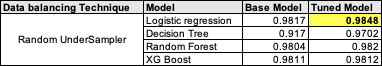



<font color= Violet size = 5> Random OverSampler for Data balancing : </font>


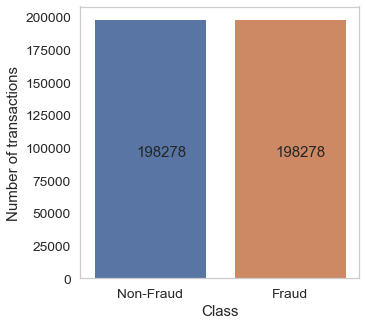

In [ ]:
#Plotting 
ros = RandomOverSampler(sampling_strategy='auto', random_state=33)
X_ros, y_ros = ros.fit_resample(X_train, y_train)
plt.figure(figsize=(5,5))
sns.barplot(['Non-Fraud','Fraud'], [Counter(y_ros)[0], Counter(y_ros)[1]])
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.annotate('{}'.format(Counter(y_ros)[0]), (0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}'.format(Counter(y_ros)[1]), (0.70, 0.45), xycoords='axes fraction')
plt.show()

In [102]:
ros = RandomOverSampler(sampling_strategy='auto', random_state=33)
X_train_ros,y_train_ros=ros.fit_resample(X_train_cv_pow,y_train_cv)
X_test_ros,y_test_ros=ros.fit_resample(X_test_cv_pow,y_test_cv)

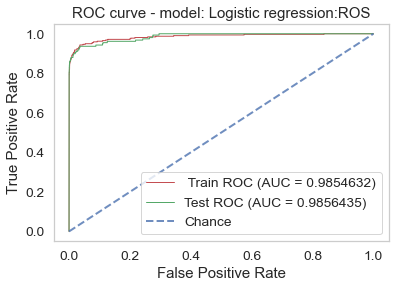

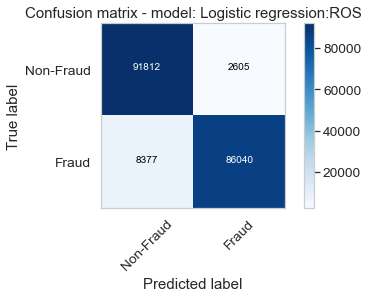

                     Model       AUC  Accuracy  Precision    Recall        F1
0  Logistic regression:ROS  0.985644  0.941843   0.970613  0.911277  0.940009


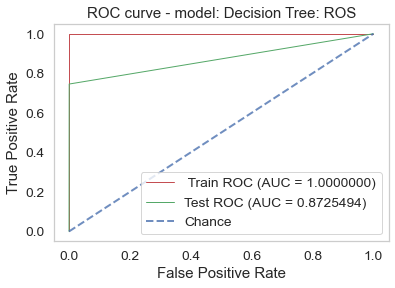

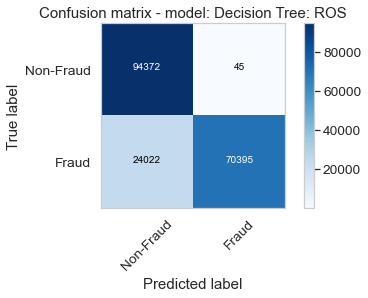

                Model       AUC  Accuracy  Precision    Recall        F1
0  Decision Tree: ROS  0.872549  0.872549   0.999361  0.745575  0.854013


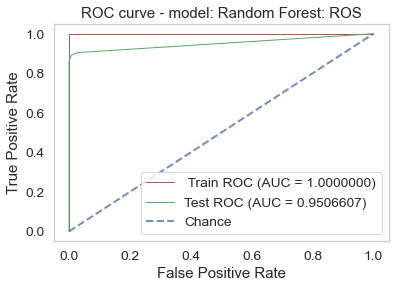

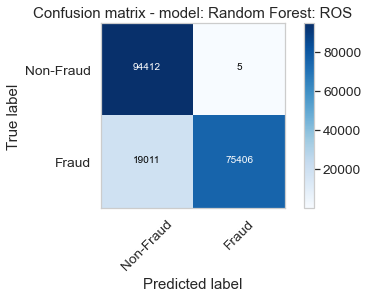

                Model       AUC  Accuracy  Precision    Recall        F1
0  Random Forest: ROS  0.950661  0.899298   0.999934  0.798649  0.888028


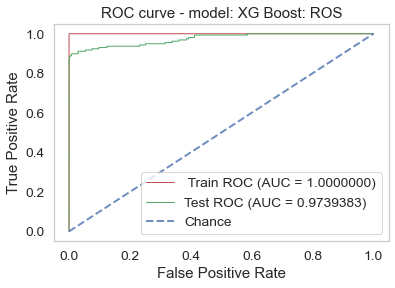

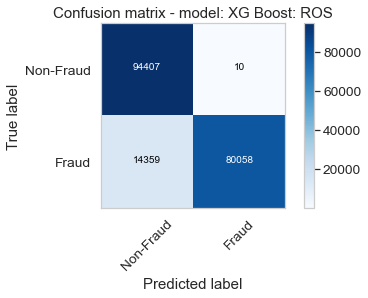

           Model       AUC  Accuracy  Precision    Recall        F1
0  XG Boost: ROS  0.973938  0.923907   0.999875  0.847919  0.917649


In [105]:
#Building Base Models on Random OverSampler dataset:
base_models('ROS',X_train_ros,y_train_ros,X_test_ros,y_test_ros)

LR hyper parameter tuning

 Best: 0.982642 using {'solver': 'liblinear', 'penalty': 'l2', 'C': 100}
DT hyper parameter tuning


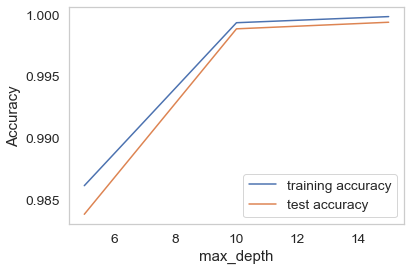

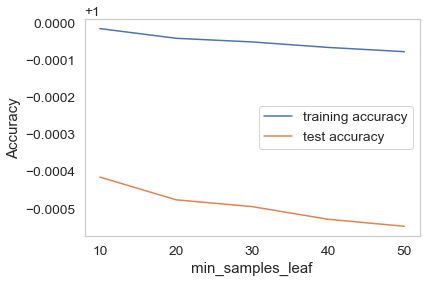

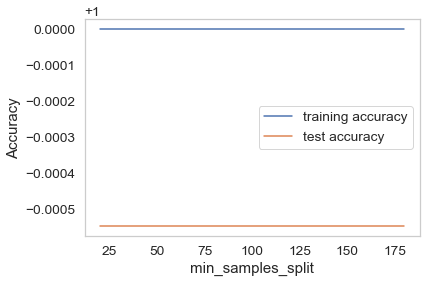

RF hyper parameter tuning
tuned hpyerparameters :(best parameters)  {'n_estimators': 150, 'min_samples_split': 100, 'min_samples_leaf': 40, 'max_depth': 15}
accuracy : 0.9998699371154257
XG Boost hyper parameter tuning
tuned hpyerparameters :(best parameters)  {'n_estimators': 150, 'min_child_weight': 1, 'max_depth': 5}
accuracy : 0.9998948397186548


In [106]:
#Hyper Parameter Tuning on all the Models in RandomUnder Sampler dataset:
hp_tuning(X_train_ros,y_train_ros)

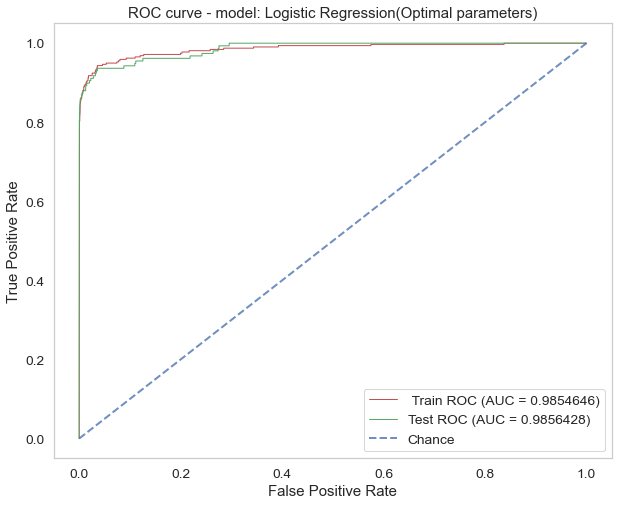

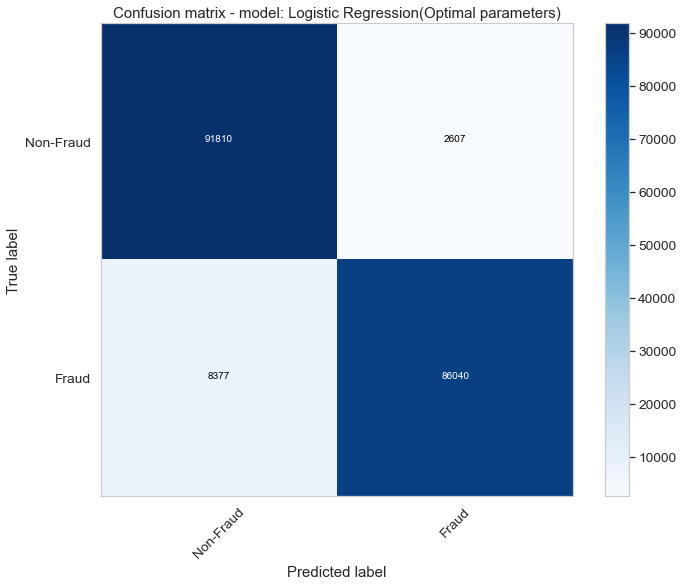

                                     Model       AUC  Accuracy  Precision  \
0  Logistic Regression(Optimal parameters)  0.985643  0.941833   0.970591   

     Recall        F1  
0  0.911277  0.939999  


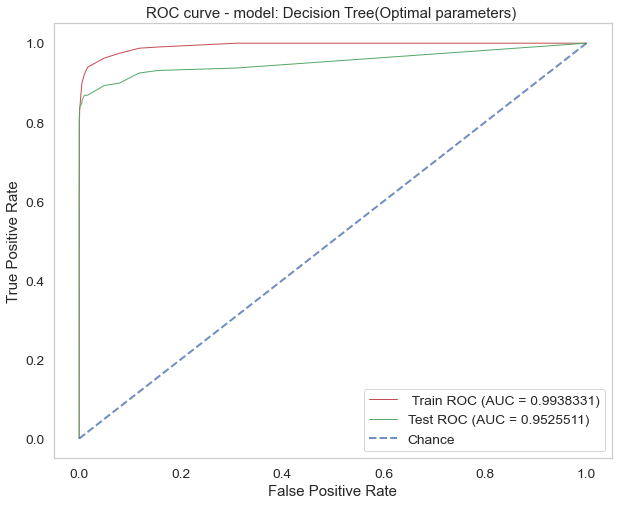

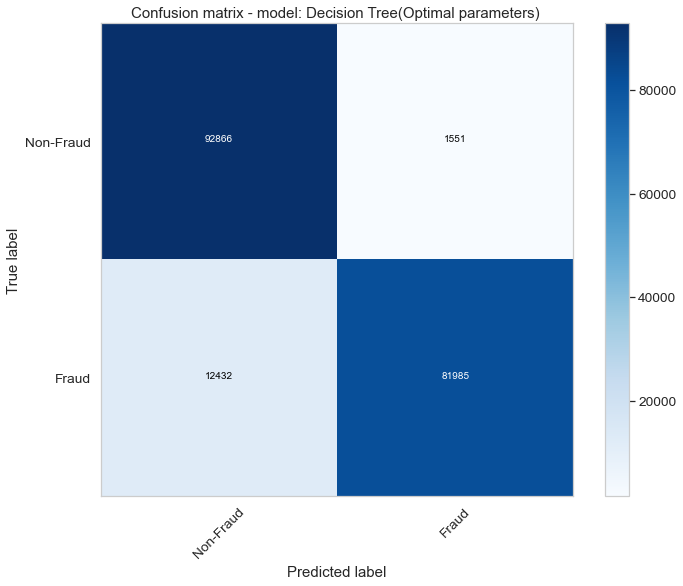

                                Model       AUC  Accuracy  Precision  \
0  Decision Tree(Optimal parameters)   0.952551  0.925951   0.981433   

     Recall        F1  
0  0.868329  0.921423  


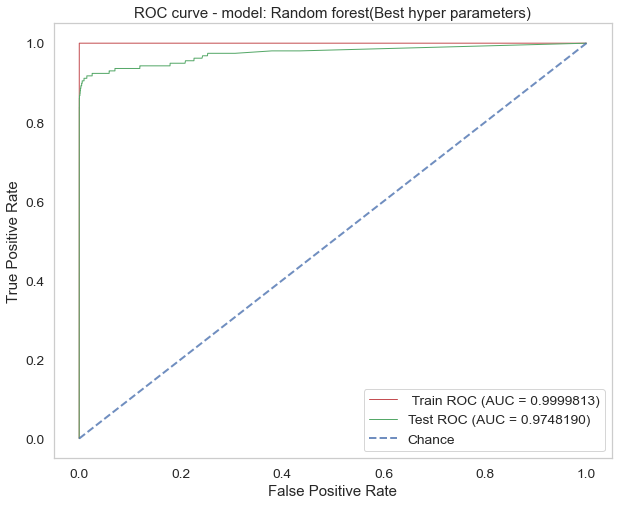

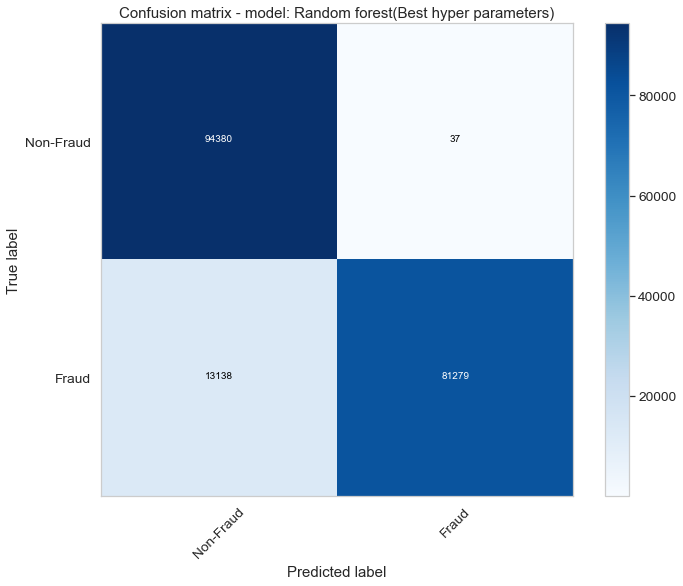

                                  Model       AUC  Accuracy  Precision  \
0  Random forest(Best hyper parameters)  0.974819   0.93023   0.999545   

     Recall        F1  
0  0.860851  0.925028  


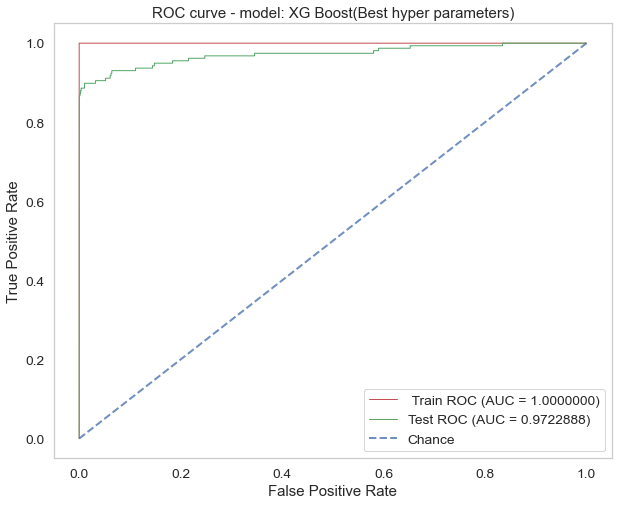

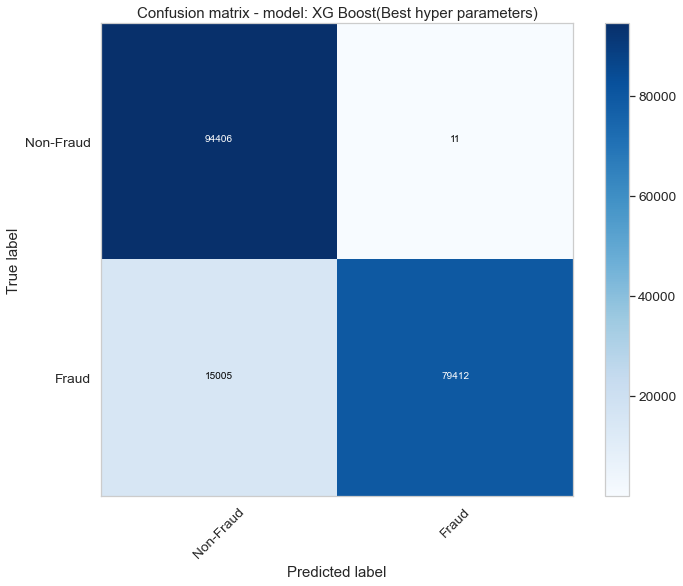

                             Model       AUC  Accuracy  Precision    Recall  \
0  XG Boost(Best hyper parameters)  0.972289   0.92048   0.999862  0.841077   

         F1  
0  0.913622  


In [123]:
#Hyper Parameter Tuned Models on Random OverSampler dataset:
tuned_models('BEST',X_train_ros,y_train_ros,X_test_ros,y_test_ros)

<font color ='blue' size = 5> Inference: </font>

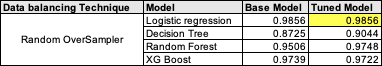


<font color= Violet size = 5> ADASYN for Data balancing : </font>


In [116]:
from imblearn.over_sampling import SMOTE, ADASYN

# oversampling and balancing dataset with ADASYN
ad = ADASYN(random_state=33)
X_train_ad, y_train_ad = ad.fit_resample(X_train_cv_pow, y_train_cv)
X_test_ad, y_test_ad = ad.fit_resample(X_test_cv_pow, y_test_cv)
plt.rcParams['figure.figsize'] = [8,6]

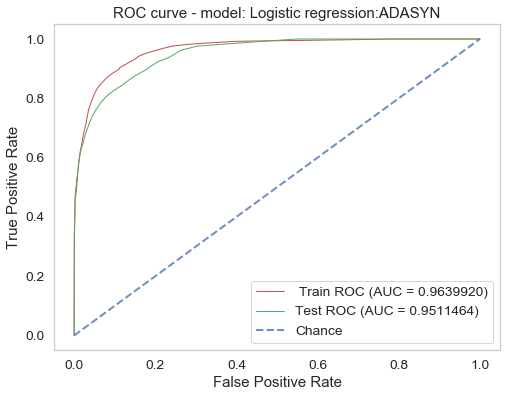

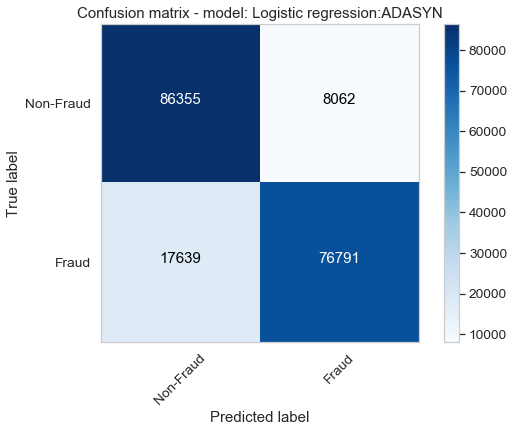

                        Model       AUC  Accuracy  Precision    Recall  \
0  Logistic regression:ADASYN  0.951146  0.863906   0.904989  0.813206   

         F1  
0  0.856646  


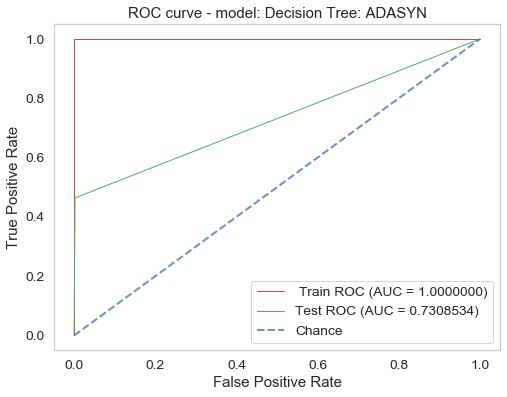

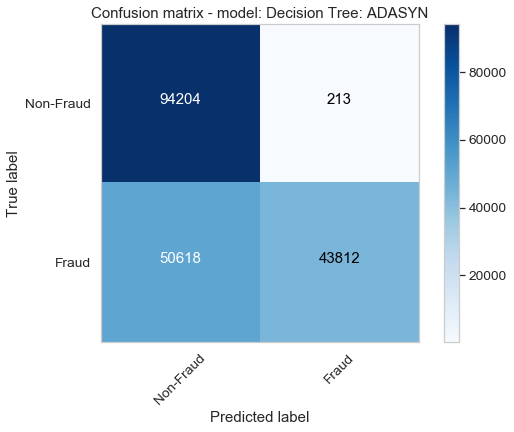

                   Model       AUC  Accuracy  Precision    Recall       F1
0  Decision Tree: ADASYN  0.730853  0.730835   0.995162  0.463963  0.63287


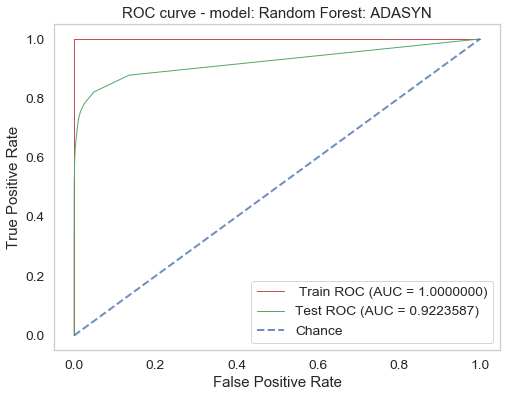

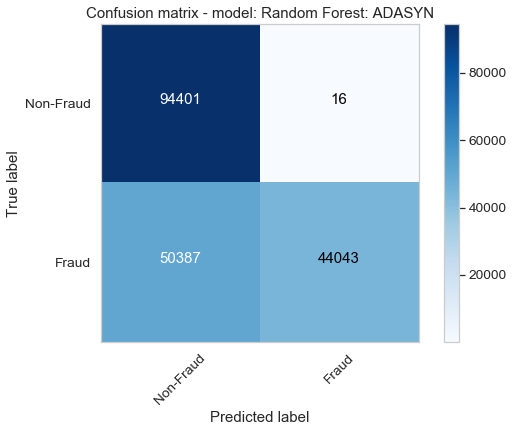

                   Model       AUC  Accuracy  Precision    Recall        F1
0  Random Forest: ADASYN  0.922359  0.733101   0.999637  0.466409  0.636051


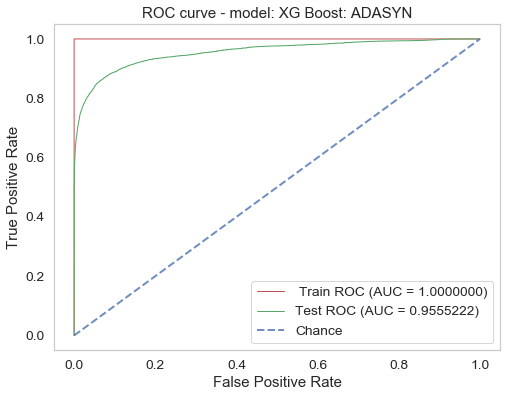

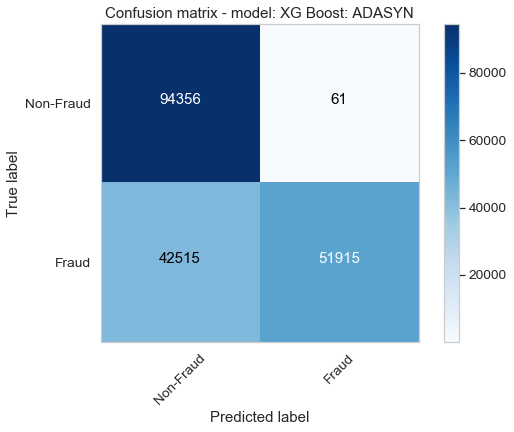

              Model       AUC  Accuracy  Precision    Recall        F1
0  XG Boost: ADASYN  0.955522  0.774548   0.998826  0.549772  0.709192


In [ ]:
#Building Base Models on ADASYN dataset:
base_models('ADASYN',X_train_ad,y_train_ad,X_test_ad,y_test_ad)

LR hyper parameter tuning

 Best: 0.946277 using {'solver': 'lbfgs', 'penalty': 'l2', 'C': 100}
DT hyper parameter tuning


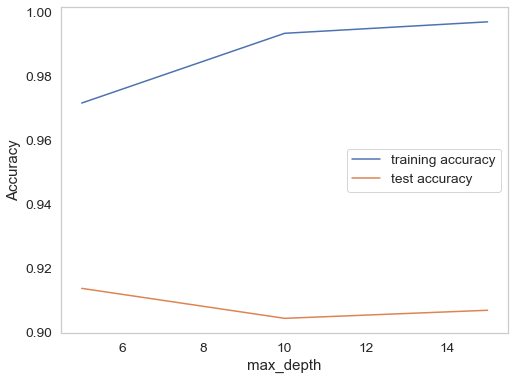

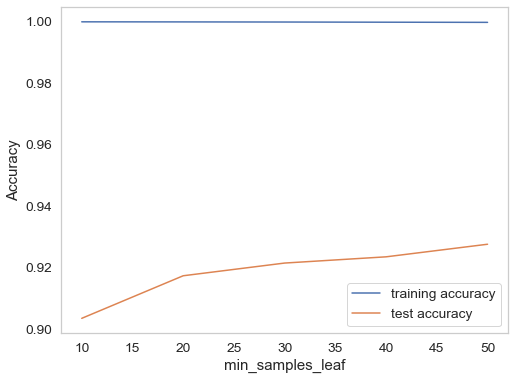

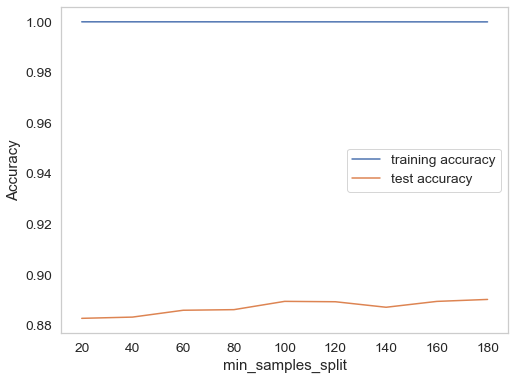

RF hyper parameter tuning
tuned hpyerparameters :(best parameters)  {'n_estimators': 150, 'min_samples_split': 100, 'min_samples_leaf': 40, 'max_depth': 15}
accuracy : 0.9899579722905992
XG Boost hyper parameter tuning
tuned hpyerparameters :(best parameters)  {'n_estimators': 140, 'min_child_weight': 1, 'max_depth': 7}
accuracy : 0.999244680986534


In [117]:
#Building HyperTuning Models on ADASYN dataset:

hp_tuning(X_train_ad,y_train_ad)

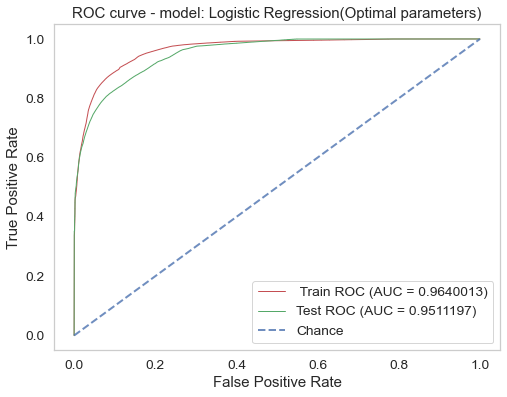

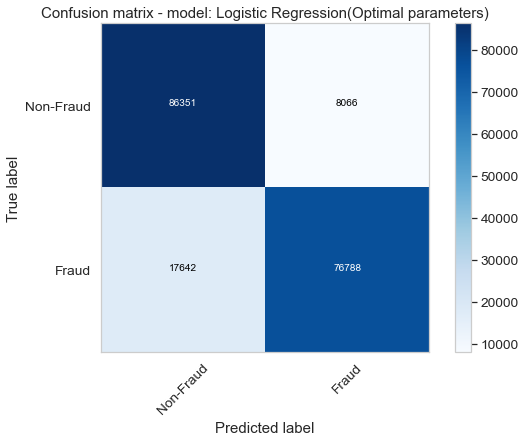

                                     Model      AUC  Accuracy  Precision  \
0  Logistic Regression(Optimal parameters)  0.95112  0.863869   0.904943   

     Recall        F1  
0  0.813174  0.856607  


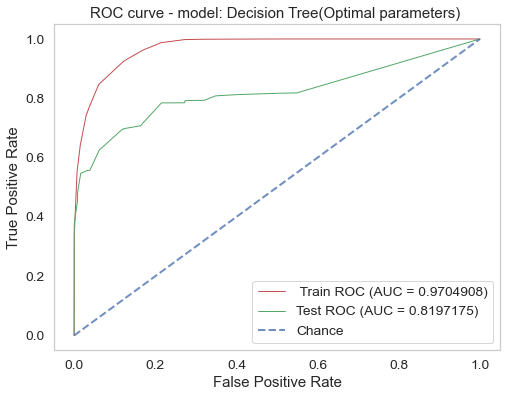

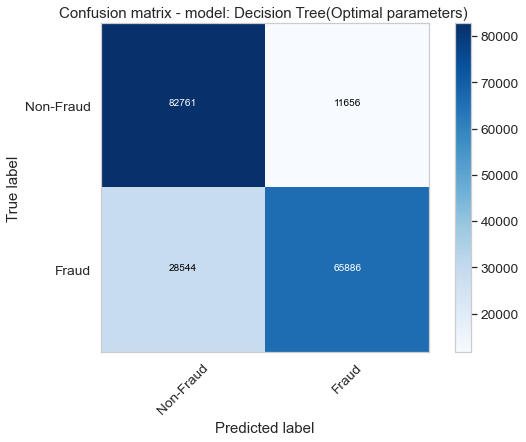

                                Model       AUC  Accuracy  Precision  \
0  Decision Tree(Optimal parameters)   0.819717  0.787129   0.849681   

     Recall        F1  
0  0.697723  0.766241  


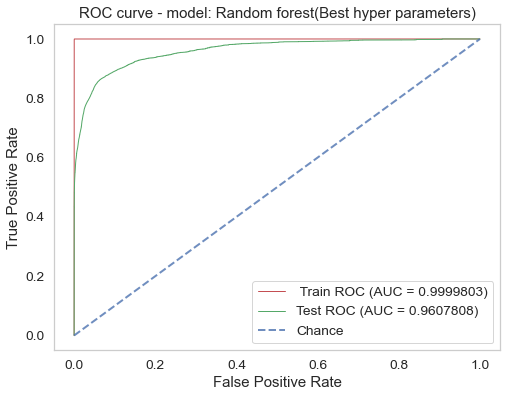

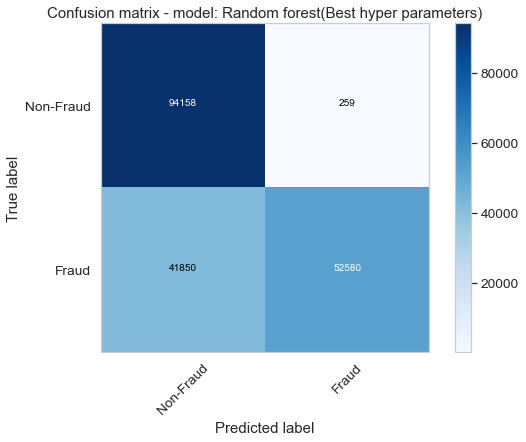

                                  Model       AUC  Accuracy  Precision  \
0  Random forest(Best hyper parameters)  0.960781  0.777021   0.995098   

     Recall        F1  
0  0.556815  0.714067  


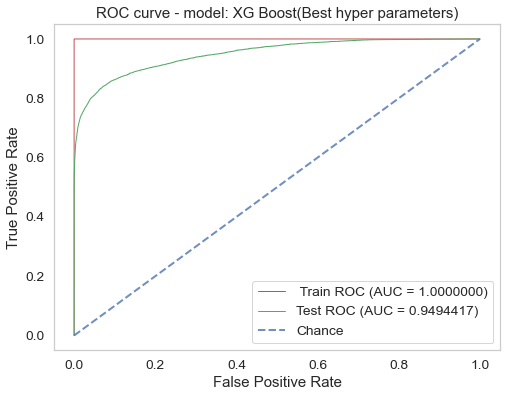

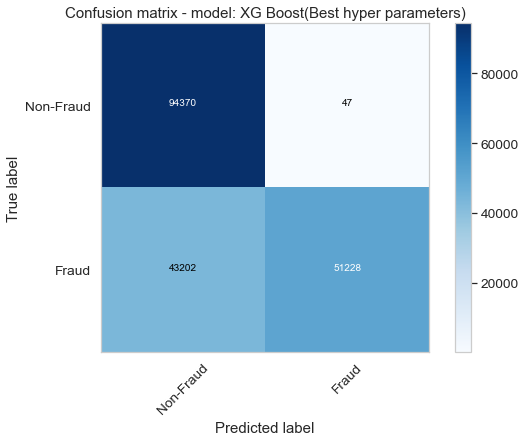

                             Model       AUC  Accuracy  Precision    Recall  \
0  XG Boost(Best hyper parameters)  0.949442  0.770984   0.999083  0.542497   

         F1  
0  0.703174  


In [119]:
#Building HyperTuned Models on ADASYN dataset:
tuned_models('BEST',X_train_ad,y_train_ad,X_test_ad,y_test_ad)

In [120]:
# oversampling and balancing dataset with ADASYN
ad2_plot = ADASYN(random_state=33)
X_train_adasyn_pow, y_train_adasyn = ad2_plot.fit_resample(X_train_cv_pow, y_train_cv)
X_test_adasyn_pow, y_test_adasyn = ad2_plot.fit_resample(X_test_cv_pow, y_test_cv)

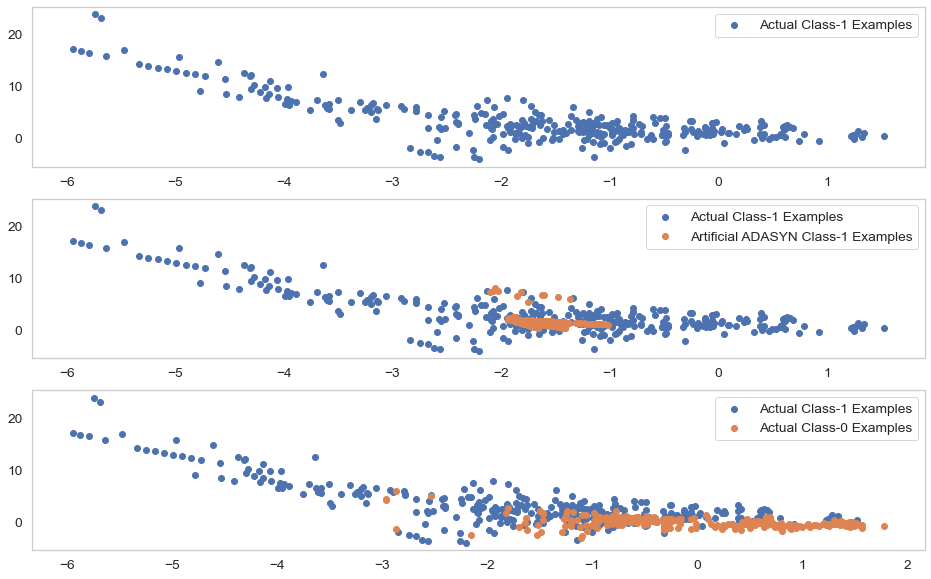

In [121]:
# Plotting Adasyn Graph:
X_train_adasyn_1 = X_train_adasyn_pow[X_train.shape[0]:].to_numpy()

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]
#X_train_adasyn_1 = X_train_adasyn_2.to_numpy()

plt.rcParams['figure.figsize'] = [16,10]
fig = plt.figure()

# Plotting Actual Fraud data distribution.

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

# Plotting data distribution with ADASYN vs Without ADASYNN.

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],label='Artificial ADASYN Class-1 Examples')
plt.legend()

# Plotting data distribution among Fraud vs Non-Fraud.

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()
plt.rcParams['figure.figsize'] = [10,8]

Top var = V5
2nd Top var = V15
3rd Top var = V18


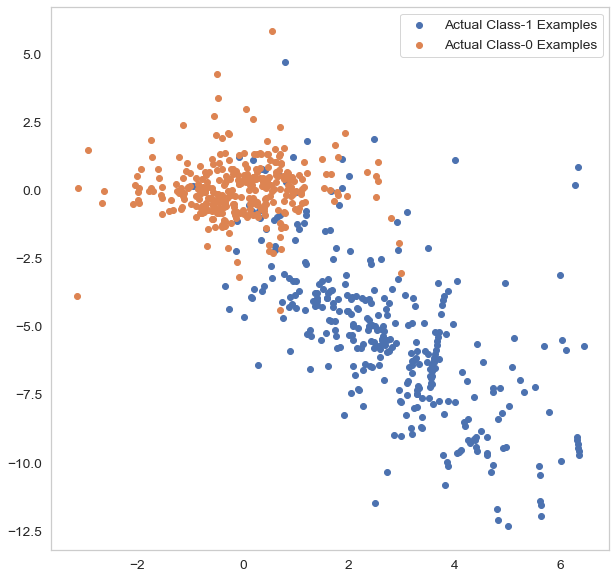

In [135]:
#Adasyn Data Distribution:
var_imp = []
rfc = RandomForestClassifier(n_jobs=-1, random_state=33)
ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train_cv_pow,y_train_cv)
rfc.fit(X_train_adasyn_pow, y_train_adasyn)
for i in rfc.feature_importances_:
    var_imp.append(i)
print('Top var =', X.columns[var_imp.index(np.sort(rfc.feature_importances_)[-1])+1])
print('2nd Top var =', X.columns[var_imp.index(np.sort(rfc.feature_importances_)[-2])+1])
print('3rd Top var =',  X.columns[var_imp.index(np.sort(rfc.feature_importances_)[-3])+1])

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(rfc.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(rfc.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

<font color ='blue' size = 5> Inference: </font>

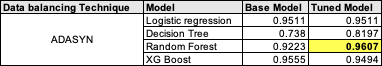
    

Finally Optimized Model Metrics:


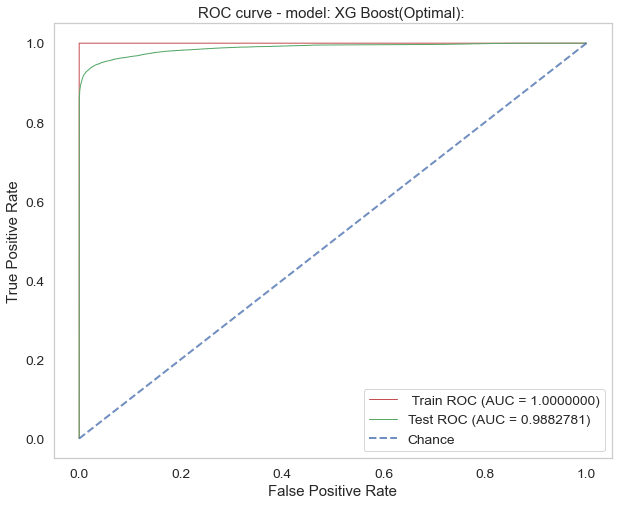

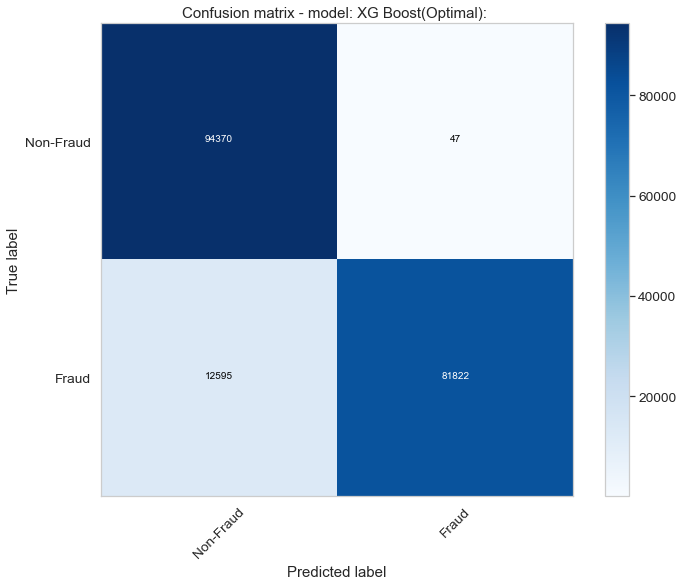

                 Model       AUC  Accuracy  Precision    Recall        F1
0  XG Boost(Optimal):   0.988278  0.933052   0.999426  0.866602  0.928287


In [122]:
#Best Optimized XG boost Model:
print('Finally Optimized Model Metrics:')
xgb_model('XG Boost(Optimal): ',X_train_smote_pow,y_train_smote,X_test_smote_pow,y_test_smote)

Top var = V15
2nd Top var = V5
3rd Top var = V13


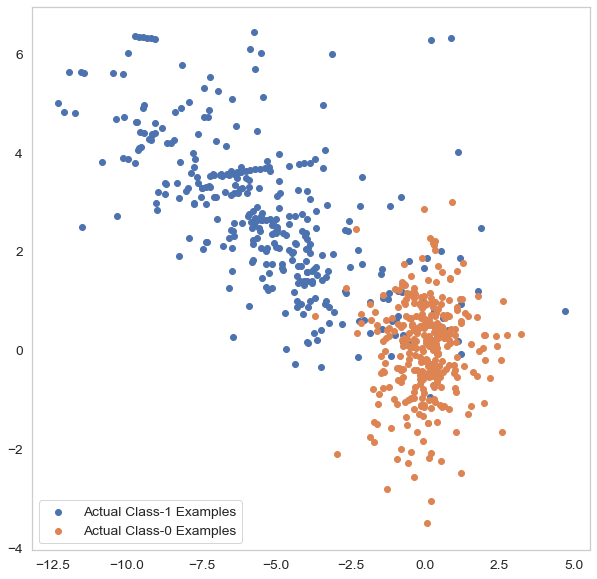

In [ ]:
#Found XGB as the better model
var_imp = []

for i in xgb.feature_importances_:
    var_imp.append(i)
print('Top var =', X.columns[var_imp.index(np.sort(xgb.feature_importances_)[-1])+1])
print('2nd Top var =', X.columns[var_imp.index(np.sort(xgb.feature_importances_)[-2])+1])
print('3rd Top var =',  X.columns[var_imp.index(np.sort(xgb.feature_importances_)[-3])+1])

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [136]:
consolidate_summary.to_excel("model_evaluation.xls")

<font color = SkyBlue size= 5> Threshold Cutoff: <font>

In [174]:
clf_xgb_cv.best_estimator_

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=140, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [188]:
#best parameter for SMOTE:
clf_final1 = clf_xgb_cv.best_estimator_

# fit on the balanced dataset
clf_final1.fit(X_train, y_train)
y_pred_final1 = clf_final1.predict_proba(X_test)

# Print the evaluation score on the X_test
print(roc_auc_score(y_test, y_pred_final1[:,1]))

0.9891447759448936


In [203]:
#Deriving Yhreshold:
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)

Threshold value is: 0.00030223225


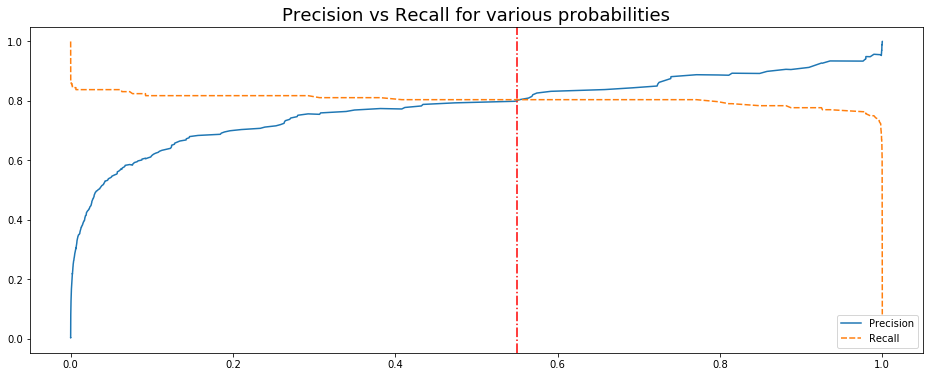

In [61]:
# Probability Distribution of Precision-Recall

from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_pred_final.converted, y_pred_final.converted_probability)

cutoff_df = pd.DataFrame({'Precision': pd.Series(p[:-1], index=thresholds),
              'Recall':pd.Series(r[:-1], index=thresholds)})
cutoff_df.head()


# Plot the trade-off
plt.figure(figsize=(16, 6))
sns.lineplot(data=cutoff_df)
plt.title('Precision vs Recall for various probabilities', fontsize=18)
plt.axvline(0.55, color='r', linestyle='-.')

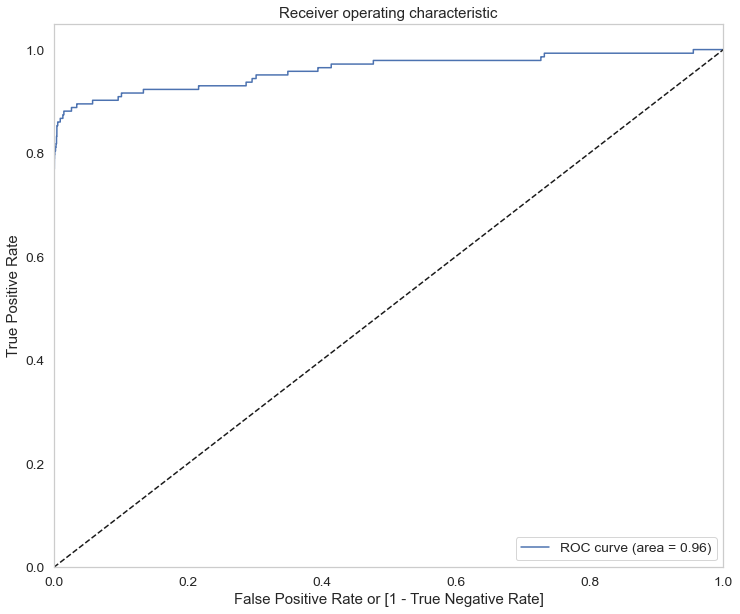

In [164]:
#### Print the FPR,TPR & select the best threshold from the roc curve
from sklearn.metrics import roc_auc_score

#Defining the function for plotting the ROC curve
from sklearn.metrics import roc_curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

fpr, tpr, thresholds = roc_curve(y_pred_final.converted,
                                         y_pred_final.converted_probability, drop_intermediate=False )

#PLotting the ROC curve
plt.figure(figsize=(12, 10))
draw_roc(y_pred_final.converted, y_pred_final.converted_probability)

In [166]:
#Final Predict train post threshold:
predicted_final_train = y_pred_final.converted_probability.map( lambda x: 1 if x > threshold else 0)

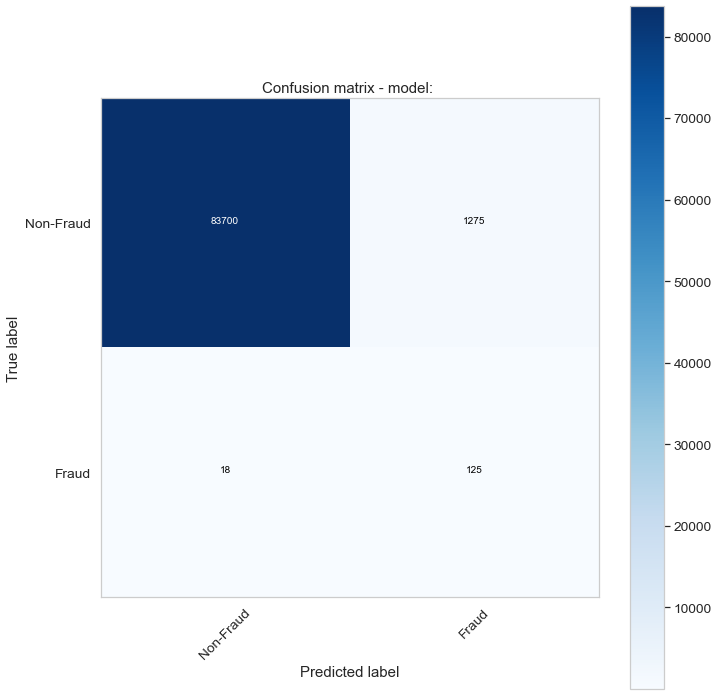

In [170]:
#confustion Matrix post threshold:
cnf_matrix = confusion_matrix(y_pred_final.converted, predicted_final_train)
confusion_matrix_total = [[0, 0], [0, 0]]
confusion_matrix_total += cnf_matrix    
class_names = ['Non-Fraud', 'Fraud']
# Plotting of confusion matrix:
plt.figure()
confusion_matrix_plot(confusion_matrix_total, classes=class_names, title='Confusion matrix - model: ' )
plt.show()

In [210]:
#Print precision and recall
tn, fp = confusion_matrix_total.tolist()[0]
fn, tp = confusion_matrix_total.tolist()[1]

accuracy = metrics.accuracy_score(y_pred_final.converted, predicted_final_train)                               
precision = metrics.precision_score(y_pred_final.converted, predicted_final_train)
recall = metrics.recall_score(y_pred_final.converted, predicted_final_train)
f1_score=metrics.f1_score(y_pred_final.converted, predicted_final_train)

print('Metrics:')
print('accuracy:' , accuracy)
print('precision:' , precision)
print('recall:' , recall)
print('f1_score:' , f1_score)

Metrics:
accuracy: 0.9848093235273385
precision: 0.08928571428571429
recall: 0.8741258741258742
f1_score: 0.16202203499675957


<font size= 5 color = blue>Inference:</font>

- With Cut-Off Threshold we don't see much change in predictions.

In [137]:
#Major Model Metrics for Balanced Dataset:
consolidate_summary

Model       AUC  Accuracy  Precision  \
0                          Logistic Regression  0.969943  0.999142   0.843137   
1      Logistic Regression(Optimal parameters)  0.972046  0.999107   0.852632   
2   Logistic Regression (cross validated data)  0.977961  0.999281   0.909091   
3      Logistic Regression(Optimal parameters)  0.979305  0.999281   0.916667   
4                                          SVM  0.973263  0.999471   0.869863   
5                                          SVM  0.949266  0.999366   0.945455   
6                                          SVM  0.879582  0.998488   0.551724   
7                                          SVM  0.915746  0.999514   0.888889   
8                    SVM Hyper Parameter Tuned  0.973541  0.999492   0.881944   
9                                Decision Tree  0.879466  0.999038   0.693642   
10          Decision Tree(Optimal parameters)   0.955330  0.999387   0.878788   
11                    Random Forest Classifier  0.954169  0.999577   0.946970   
12        Random forest(Best hyper parameters)  0.976570  0.999334   0.899160   
13                                    XG Boost  0.982290  0.999609   0.968992   
14             XG Boost(Best hyper parameters)  0.973177  0.999577   0.946970   
15                     Logistic regression:ROS  0.985644  0.941843   0.970613   
16                          Decision Tree: ROS  0.872549  0.872549   0.999361   
17                          Random Forest: ROS  0.950661  0.899298   0.999934   
18                               XG Boost: ROS  0.973938  0.923907   0.999875   
19           Logistic regression(Optimal):BEST  0.985644  0.941843   0.970613   
20                Decision Tree(Optimal): BEST  0.872549  0.872549   0.999361   
21                Random Forest(Optimal): BEST  0.950661  0.899298   0.999934   
22                   Logistic regression:SMOTE  0.987330  0.939089   0.968886   
23                        Decision Tree: SMOTE  0.904186  0.904186   0.997484   
24                        Random Forest: SMOTE  0.978369  0.922180   0.999787   
25                             XG Boost: SMOTE  0.988278  0.933052   0.999426   
26     Logistic Regression(Optimal parameters)  0.987330  0.939095   0.968897   
27          Decision Tree(Optimal parameters)   0.958168  0.919093   0.955319   
28        Random forest(Best hyper parameters)  0.987517  0.933592   0.999025   
29             XG Boost(Best hyper parameters)  0.989145  0.933540   0.999597   
30     Logistic Regression(Optimal parameters)  0.951120  0.863869   0.904943   
31          Decision Tree(Optimal parameters)   0.819717  0.787129   0.849681   
32        Random forest(Best hyper parameters)  0.960781  0.777021   0.995098   
33             XG Boost(Best hyper parameters)  0.949442  0.770984   0.999083   
34                         XG Boost(Optimal):   0.988278  0.933052   0.999426   
35     Logistic Regression(Optimal parameters)  0.985643  0.941833   0.970591   
36          Decision Tree(Optimal parameters)   0.952551  0.925951   0.981433   
37        Random forest(Best hyper parameters)  0.974819  0.930230   0.999545   
38             XG Boost(Best hyper parameters)  0.972289  0.920480   0.999862   

      Recall        F1  
0   0.601399  0.702041  
1   0.566434  0.680672  
2   0.632911  0.746269  
3   0.626582  0.744361  
4   0.803797  0.835526  
5   0.658228  0.776119  
6   0.506329  0.528053  
7   0.810127  0.847682  
8   0.803797  0.841060  
9   0.759494  0.725076  
10  0.734177  0.800000  
11  0.791139  0.862069  
12  0.677215  0.772563  
13  0.791139  0.871080  
14  0.791139  0.862069  
15  0.911277  0.940009  
16  0.745575  0.854013  
17  0.798649  0.888028  
18  0.847919  0.917649  
19  0.911277  0.940009  
20  0.745575  0.854013  
21  0.798649  0.888028  
22  0.907315  0.937090  
23  0.810415  0.894272  
24  0.844541  0.915630  
25  0.866602  0.928287  
26  0.907315  0.937096  
27  0.879312  0.915741  
28  0.868032  0.928933  
29  0.867429  0.928835  
30  0.813174  0.856607  



<!--                             Model       AUC  Accuracy    Precision    Recall           F1  
  XG Boost(Best hyper parameters)  0.989145   0.93354   0.999597  0.867429     0.928835
 
                                  Model       AUC  Accuracy  Precision      Recall        F1
  Random forest(Best hyper parameters)  0.960781  0.777021   0.995098    0.556815  0.714067

                                    Model       AUC  Accuracy  Precision     Recall        F1  
  Logistic Regression(Optimal parameters)  0.985643  0.941833   0.970591    0.911277  0.939999   

                                      Model       AUC  Accuracy  Precision    Recall        F1 
  Logistic Regression(Optimal parameters)  0.984858  0.933544        1.0    0.867089  0.928814

 -->

 
- When we use SMOTE method the best model was a XGBoost model with AUC = 0.9891, recall = 86.74% and precision = 99.99%.tweaking the weights for each simple model might be a way to enhance the result.

<br>

- When we use ADASYN method the best model was a RandomForest model with AUC = 0.9607, recall = 55.68% and precision = 99.50%.tweaking the weights for each simple model might be a way to enhance the result.

<br>

- When we use random undersampling the best model was a Logistic with AUC = 0.9848, recall = 86.70% and precision = 100%. However,a lot of information is lost due to discarding part of the observations.

<br>

- When we use random oversampling method the best model was a Logistic Regression with AUC = 0.9856, recall = 91.12% and precision = 97.05%.



<font color = 'Blue' size = 5> Inference </font>
<img src = "Imbalance_Metrics.png">

<font color = blue size = 5> Inference: </font> 

- Post Evaluation of all the models before & after Data Balancing Techniques:

- Top Contributinig Features in both XG & RF models are: V5 & V15.

- XG boost is outperformed among of all the below mentioned:
    
> Imbalanced Dataset Modeling with - Logisitic Regression, SVM, Decision Tree, KNN, RandomForest, XG boost.
>  Data Balancing Techniques used: Random Under Sampling, Random Over Sampling, SMOTE, ADASYN.
>  Balanced Dataset Modeling with - Logisitic Regression, Decision Tree,RandomForest, XG boost.

 <font color = Skyblue size = 5> Recommendations: </font> 
 
- For this given Problem statement, XG Boost is the most preferred model as it can handle large volumes & Imbalanced Datasets.
 
<br> 
>  Bank can act on as per model predictions:

. Banks can flag the possible fraud transactions which helps them to reach out customer base on real time basis. 

. Banks can hold flagged transactions, can relase funds post customer confirmations.

. Banks should take periodic reviews, for these alerts.

. Banks even can alerts customer so that, from back end they can block the credit card for temporary time period, post customer dispute ticket raised.
